In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.simplefilter(action='ignore',category=Warning)

plt.style.use('dark_background')

In [2]:
india=pd.read_csv(r"C:\Users\Varsha Pawar\Documents\Dataset_ml_r\cases\data.csv",parse_dates=True,encoding="ISO-8859-1")
india.head(15)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [3]:
india.shape

(435742, 13)

In [4]:
india.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [5]:
#Checking Null values

total=india.isnull().sum().sort_values(ascending=False)
percent=(total*100/india.isnull().count()).sort_values(ascending=False)
missing=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [6]:
#seperating categorical and numerical columns

obj=[india.select_dtypes(include=['object']).columns]
num=india.dtypes[india.dtypes!='object'].index

print('Categorical columns :\n',obj,'\n')
print('*'*90,'\n')
print('Numerical columns :\n',num)

Categorical columns :
 [Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'location_monitoring_station', 'date'],
      dtype='object')] 

****************************************************************************************** 

Numerical columns :
 Index(['so2', 'no2', 'rspm', 'spm', 'pm2_5'], dtype='object')


In [7]:
india_new=india.drop(['pm2_5','agency','stn_code','sampling_date','location_monitoring_station'],axis=1)


In [8]:
india_new.tail(10)

,state,location,type,so2,no2,rspm,spm,date
435732,West Bengal,ULUBERIA,RIRUO,22.0,50.0,145.0,NaN,2015-12-09
435733,West Bengal,ULUBERIA,RIRUO,34.0,61.0,161.0,NaN,2015-12-12
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,NaN,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,NaN,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,NaN,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:

#as  their are only 7 nan values for date we will drop them

india_new['date'] = pd.to_datetime(india_new['date'])

india_new = india_new[india_new['date'].isna()==False]



In [10]:
#after droping Nan values in date column

india_new.isnull().sum()

state            0
location         0
type          5390
so2          34643
no2          16230
rspm         40219
spm         237380
date             0
dtype: int64

In [11]:
# Checking dtypes of columns

india_new.dtypes

state               object
location            object
type                object
so2                float64
no2                float64
rspm               float64
spm                float64
date        datetime64[ns]
dtype: object

In [12]:
#Count of Nan values in the remaining column

india_new.isnull().sum()

state            0
location         0
type          5390
so2          34643
no2          16230
rspm         40219
spm         237380
date             0
dtype: int64

In [13]:
#type column consists of 5390 null values, lets fill this null values with 'NA' as not available

india_new['type']=india_new['type'].fillna('NA')

In [14]:
india_new.isnull().sum()

state            0
location         0
type             0
so2          34643
no2          16230
rspm         40219
spm         237380
date             0
dtype: int64

In [15]:
#Let's take a close look at type column

india_new['type'].value_counts()

Residential, Rural and other Areas    179013
Industrial Area                        96089
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8979
Sensitive Areas                         5536
NA                                      5390
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [16]:
res=india_new['type'].str.contains('Residential|RIRUO',regex=True)
sens=india_new['type'].str.contains('Sensitive',regex=True)
indi=india_new['type'].str.contains('Industrial',regex=True)

india_new['type'][res]='RRO'
india_new['type'][sens]='Sensitive'
india_new['type'][indi]='Industrial'


In [17]:
india_new['type'].value_counts()

RRO           267266
Industrial    148069
Sensitive      15010
NA              5390
Name: type, dtype: int64

In [18]:
#HANDALING NUMERICAL COLUMNS

#SO2
india_new['so2'].describe()

#The below info shows that 75% of the value lies within 13.0 and the max value is 909
#which says that their are outliers present.

count    401092.000000
mean         10.829428
std          11.177239
min           0.000000
25%           5.000000
50%           8.000000
75%          13.700000
max         909.000000
Name: so2, dtype: float64

In [19]:
#Function to see the distributions of numerical columns and the skewness

def distribution(x):
    print(f"Distribution of {x}")
    fig,ax=plt.subplots(1,2,figsize=(13,4))
    sns.distplot(india_new[x].dropna(),ax=ax[0],color='hotpink')
    sns.boxplot(india_new[x].dropna(),ax=ax[1])
    skew=india_new[x].skew()

    plt.show()
    print('skewness: ',skew)


In [20]:
#Function to remove the outlier and plot the distribution and also calculate the skewness

def outliers(x):
    global india_new
    Q1=india_new[x].quantile(0.25)
    Q3=india_new[x].quantile(0.75)
    IQR=Q3-Q1
    
    india_new=india_new[~((india_new[x]<(Q1-1.5*IQR))|(india_new[x]>(Q3+1.5*IQR)))]
    
    distribution(x)

Distribution of so2


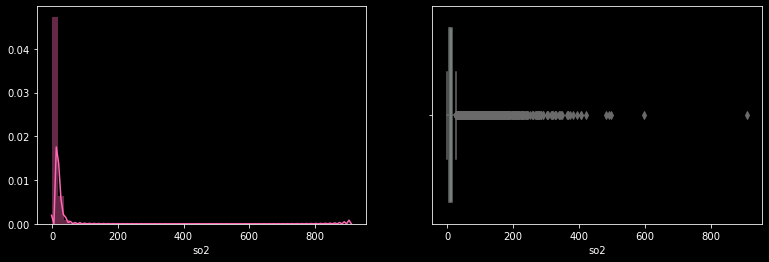

skewness:  8.521026971966139


In [21]:
#Now lets check the distribution of all the numerical columns one by one, lets start with so2

distribution('so2')

Distribution of so2


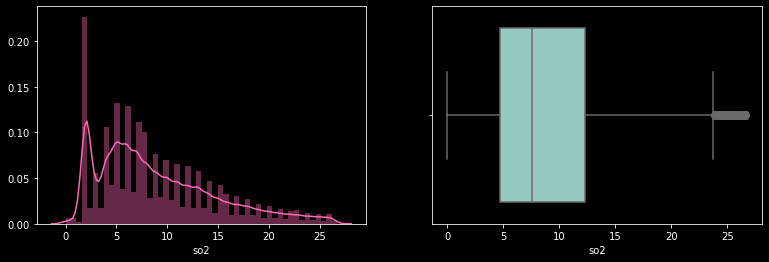

skewness:  0.8881595669996004


In [22]:
#Let's remove the outlier and adjust the skewness of so2
outliers('so2')

#Now we can see that the significant poitive skewness has been reduced to acceptable level

In [23]:
#TREATING MISSING VALUES

def mean_median(x):
    print("Total null values:",india_new[x].isnull().sum())
    sns.kdeplot(india_new[x].dropna())
    plt.axvline(india_new[x].mean(),color='r')
    plt.axvline(india_new[x].median(),color='g')

    plt.legend([x,'mean','median'])

Total null values: 34643


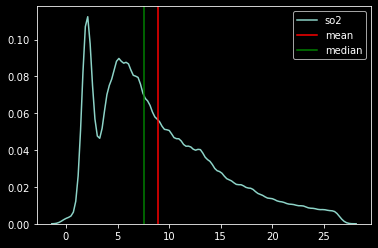

In [24]:
mean_median('so2')

In [25]:
#Now lets check if mean imputation is better or forward fill, one of which will show more
#variation in distribution of data that will be discarded and the other one will be used

In [26]:
def imputation_plots(x):
    df1=india_new.copy()
    df2=india_new.copy()
    
    #imputation with mean
    df1[x]=df1[x].fillna(df1[x].mean())

    #imputation with forward fill
    df2[x]=df2[x].fillna(method='ffill')
    
    #PLOTS
    fig,ax=plt.subplots(1,2,figsize=(13,4))
    
    sns.kdeplot(df1[x],ax=ax[0])
    ax[0].axvline(df1[x].mean(),color='r')
    ax[0].axvline(df1[x].median(),color='g')
    ax[0].set_title('Mean_Imputation')
    ax[0].legend([x,'Mean','Median'])
    
   
    sns.kdeplot(df2[x],ax=ax[1])
    ax[1].axvline(df2[x].mean(),color='r')
    ax[1].axvline(df2[x].median(),color='g')
    ax[1].set_title('Forward Fill')
    ax[1].legend([x,'Mean','Median'])
    
    plt.show()

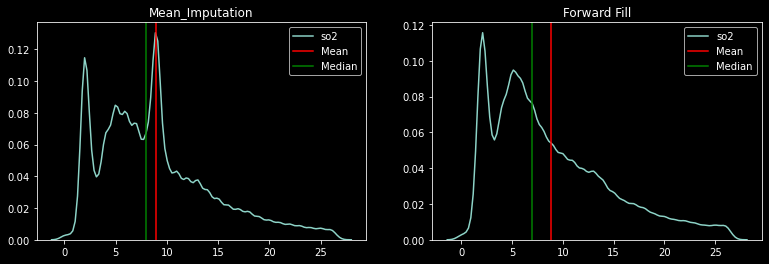

In [27]:
#Let's start the imputation with so2

imputation_plots('so2')

In [28]:
#filling Nan values in so2 with forward fill method

india_new['so2']=india_new['so2'].fillna(method='ffill')

In [29]:
#NO2 COLUMN

india_new['no2'].describe()

count    396375.000000
mean         24.734928
std          17.113930
min           0.000000
25%          13.800000
50%          21.000000
75%          31.000000
max         876.000000
Name: no2, dtype: float64

Distribution of no2


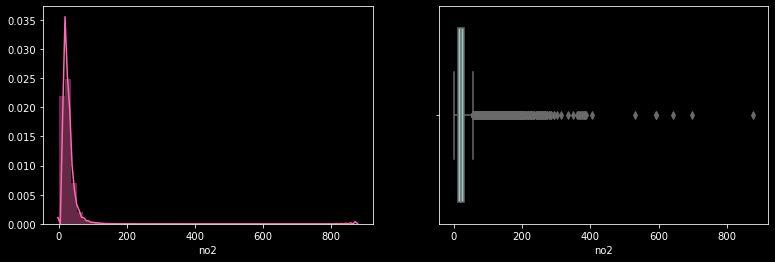

skewness:  3.5414717457036953


In [30]:
#1.Distribution

distribution('no2')

In [31]:
#The plot shows positive skewness and lots of outliers

Distribution of no2


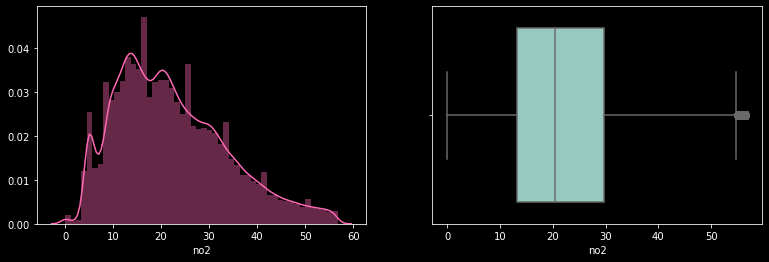

skewness:  0.6614815004927441


In [32]:
#2.Remove Outliers From No2

outliers('no2')

In [33]:
#after removing the outliers, the plot is skewed in accepteable form

Total null values: 16167


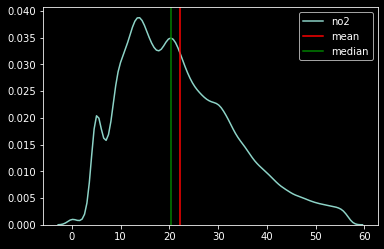

In [34]:
#TREATING MISSING VALUES

#1.Distibution of mean and median
mean_median('no2')


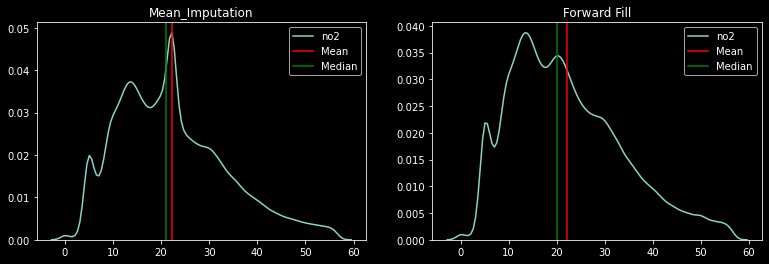

In [35]:
#2.Comparing mean imputation and forward fill
imputation_plots('no2')

In [36]:
#again forward fill wins, as it does not make any variation in dataset

india_new['no2']=india_new['no2'].fillna(method='ffill')

In [37]:
#rspm column
india_new['rspm'].describe()

#summary of rspm says that their is presence of outlier, as 75% is within 135 and max is 6307

count    361301.000000
mean        104.466161
std          71.131097
min           0.000000
25%          55.000000
50%          87.000000
75%         135.000000
max        6307.033333
Name: rspm, dtype: float64

Distribution of rspm


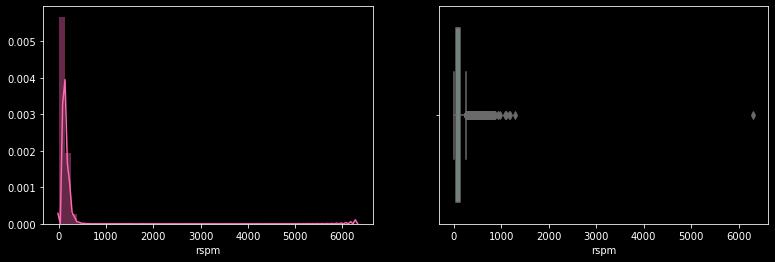

skewness:  3.5635618320679323


In [38]:
#1. Distribution plots
distribution('rspm')

#yes, the plot is positively skewed with long tail and one outlier with highest value

Distribution of rspm


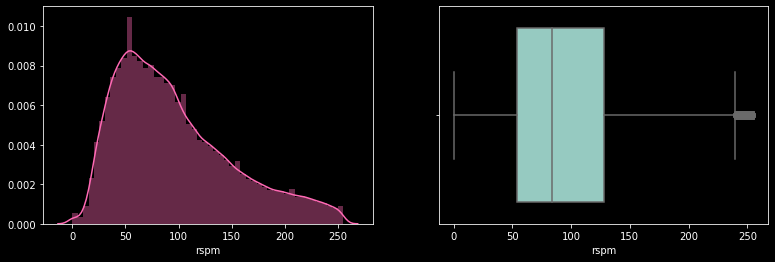

skewness:  0.8297993158420551


In [39]:
#2.Remove Outlier
outliers('rspm')

#after treating the outlier the skewness is reduced and that one outlier is removed

Total null values: 33626


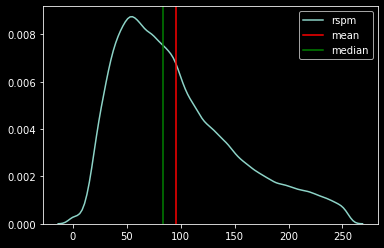

In [40]:
#TREATING MISSING VALUES

#1. Distribution of mean and median
mean_median('rspm')

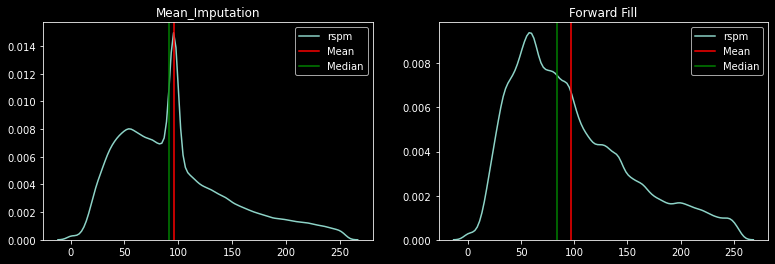

In [41]:
#2.Compare the mean impute and forward fill
imputation_plots('rspm')

In [42]:
#The above plots show that filling the missing values with Forward Fill dosen't cause any 
#much variation on the data, so we can choose Forward Fill

In [43]:
india_new['rspm']=india_new['rspm'].fillna(method='ffill')
india_new['rspm'].isnull().sum()

904

In [44]:
#still thier are 899 nan values, so we will fill them with mean
india_new['rspm']=india_new['rspm'].fillna(india_new['rspm'].mean())
india_new['rspm'].isnull().sum()

0

In [45]:
#spm Column
india_new['spm'].describe()


#Woah! theirs significant outlier are present in spm

count    170576.000000
mean        201.958790
std         130.859178
min           0.000000
25%         104.000000
50%         177.000000
75%         272.000000
max        2366.000000
Name: spm, dtype: float64

Distribution of spm


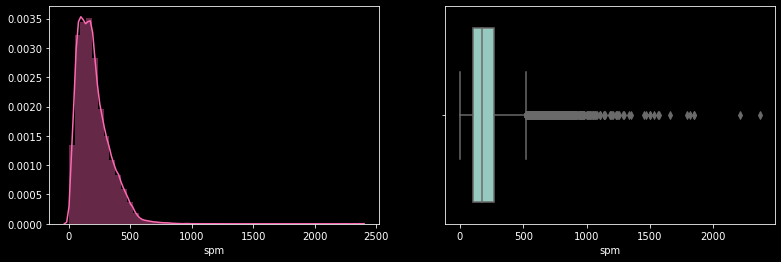

skewness:  1.2799169518603974


In [46]:
#1.Distribution
distribution('spm')

#clearly thier are lots of outlier present in spm and thats why its positivdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAw0AAAEGCAYAAAAnuXkKAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3df1hU553//yczDL9VBFQUVGwcXTS/8Ae0a2J/JUH8tiFXm3Zx8/mY2l5o/IR2u93Pd7W58tl+Ptle2aTtfrs2NX69aO3G75qy2a1JSCtBk2y2abYxk4hEiyhj0EgQFFAE+T1zvn8gE1CYGXCGM8y8Htd1rnAO932f9z0TOfOe+77PiQIMRERERERExmAxOwAREREREQltShpERERERMQrJQ0iIiIiIuKVkgYREREREfFKSYOIiIiIiHgVbXYAgXDhwgXOnj1rdhgiIiFr4cKFzJ492+wwTKfrhYiId2NdL8IiaTh79iyrV682OwwRkZDlcDjMDiEk6HohIuLdWNcLTU8SERERERGvlDSIiIiIiIhXShpERERERMQrJQ0iIiIiIuKVkgYREREREfFKSYOIiIiIiHilpEFERERERLzyK2nIz8+ntraWuro6tm3bNmqZHTt2UFdXR3V1NTk5OT7rPvHEE1RXV1NVVUVlZSVz584FBh8o0dXVRVVVFVVVVezatetm+iciIiIiIgFgeNssFovhdDqNRYsWGTabzTh69KiRnZ09okxBQYFx4MABAzDy8vKMd955x2fdadOmeep/+9vfNnbt2mUAxsKFC41jx455jen6zeFwjKt8oLZoi9V478F/Mp656xFTzq9NmzZt/m5m/Z0MtU2vgzZt2rR538b6O+lzpCE3Nxen00l9fT39/f2UlZVRWFg4okxhYSF79+4F4PDhwyQnJ5Oenu61bkdHh6d+YmIihmH4CiXkbFj8WVbOWkzJbV9iy7ICs8MREREREQmKaF8FMjIyOHfunGe/oaGBvLw8n2UyMjJ81v3hD3/Ixo0baW9v5/Of/7zn+KJFizhy5AhXrlzh8ccf5w9/+MPEehdEUUSxPedBqlvqabjaws/u2kx1az3vNNcCUJydP2q90hOVkxmmiIiIiMhN8znSEBUVdcOx60cFxirjq+7jjz/OggUL2LdvHyUlJQCcP3+eBQsWsGLFCr73ve/x/PPPM23atBvaKS4uxuFw4HA4SEtL89WNgLs/K49lKQt4qurf+G+v/YSPOi/yb/dtJ8kWP+mxiIiIiIgEk8+koaGhgfnz53v2MzMzaWxs9KuMP3UBnn/+eb761a8C0NfXR1tbGwBHjhzh9OnTLFmy5IY6paWlrF69mtWrV9PS0uKrGwH3/RVf43T7ef7t9B+43HeVh177CZlJafyvlUWeMjaLlRWzbmHL8gK+e3shllGSKBERERGRUOczaXA4HNjtdrKysrDZbBQVFVFeXj6iTHl5ORs3bgQgLy+P9vZ2mpqavNZdvHixp/79999Pbe3gtJ60tDQslsGwFi1ahN1u58MPPwxMbwNk1Sw7eXOW8pPq/bgMNwDvXjjFnhOH+O7t97M0OZN5iSn8n9z/xiPL13NbShbLUhaQnjDT5MhFRERERMbP55oGl8tFSUkJlZWVWK1W9uzZQ01NDVu2bAFg9+7dHDhwgPXr1+N0Ounq6mLTpk1e6wI89dRTLF26FLfbzdmzZ3nkkUcAWLt2LU888QQDAwO4XC4eeeQRLl26FKz+T8jiGYO3h33z42Mj1i78qe0sA4abg1/6e2bFT6fX1c/PPiinrbeD/736IRYmzTYrZBERERGRCfOZNABUVFRQUVEx4tju3btH7A+tSfCnLsCDDz44avn9+/ezf/9+f8Iyzaz4GQBc7Lky4nhHfzfl9Ycpsq+lobOFZ469wqXeTqKIomegj4XTlDSIiIiIyNTjV9IgI82On4HL7aKtp+OG3/3Hxx9wubeTmksf0ePqB8DA4KPOi0oaRERERGRK8uuJ0DLSrLgZtPRcweDGZ0sYGBxpOe1JGIac6bjA/KRZRFuskxWmiIiIiEhAKGmYgNnxyTdMTfLlbEczMdZols1cEKSoRERERESCQ9OTJmBW/HQudF8eV52zHRcAWDVrMR+01gcjLBERCSFr1qzx+RyhGTMG18i1t7f73W5LSwtvv/32TcUmIjJeShomYHZ8MlUtp8dV52J3O10DvayabWdP7aEgRSYiIqEiLS2N+VlZxKUkj1mmp23wC6jZtyzyq82h8iIik01JwwTMip/BhW7/vxUCMBgcbVg1a7HPsiIiEh7iUpL5VMEXxvz9hxVvAHgtc0P5M4GITERkfLSmYZxslmhmxiZxcZxJAwwmDXekLiLGolxNRERERKYOJQ3jlBY3HWDcIw0wmDTEWG3cmrIw0GGJiIiIiASNkoZx+uTBbuNPGj7qvAjAHWmfCmhMIiIiIiLBpKRhnGYPJQ0TGGm43NsJQHrC2IviRERERERCjZKGcRoaaZjI9KR+t4srfV3MiZ8Z6LBERERERIJGK3LHoTg7ny9m3gFAwfyVrJ27fNxtNHdd9oxWiIiIiIhMBRppGKdptnhchpuugZ4J1b/QfZk5mp4kIiIiIlOIkoZxmmZLoLO/G2OC9Zu7LzM7XkmDiIiIiEwdShrGaVpMPB193ROu39x9mTlKGkRERERkClHSME5Jtjg6+ieeNFzovkxq3DSsUXrpRURERGRq0CfXcZpmS7i5kYauy1iiLJ6HxImIiIiIhDolDeM0LSb+JkcaBm/VOidBt10VERERkalBScM4REdZSIiOpfMmkobm7ssAuu2qiIiIiEwZShrGIckWD0BHX9eE22juugSgxdAiIiIiMmUoaRiHaTHXkob+iT2jAT6ZnqTbroqIiIjIVOFX0pCfn09tbS11dXVs27Zt1DI7duygrq6O6upqcnJyfNZ94oknqK6upqqqisrKSubOnev53fbt26mrq6O2tpb77rtvon0LuGlDIw39Ex9paO+7Sq+rXw94ExEREZEpw2fSYLFY2LlzJwUFBSxbtowNGzaQnZ09okxBQQF2ux273c7mzZvZtWuXz7o//vGPueOOO8jJyeG3v/0tf/d3fwdAdnY2RUVFLF++nHXr1vHss89isYTGgMi0mASAm7p7EgzedlVrGkRERERkqvD5aTw3Nxen00l9fT39/f2UlZVRWFg4okxhYSF79+4F4PDhwyQnJ5Oenu61bkdHh6d+YmIihmF42iorK6Ovr48zZ87gdDrJzc0NWIdvxicjDTeXNDR3XWZOvO6eJCIiIiJTg8+kISMjg3Pnznn2GxoayMjI8KuMr7o//OEP+eijj3jooYc8Iw3+nA+guLgYh8OBw+EgLS3Nn77etGm2eFxuF10DvTfVTnP3ZU1PEhEREZEpw2fSEBUVdcOxoVEBX2V81X388cdZsGAB+/bto6SkxO/zAZSWlrJ69WpWr15NS0uLr24ERFJMPJ03sQh6iKYniYiIiMhU4jNpaGhoYP78+Z79zMxMGhsb/SrjT12A559/nq9+9at+n88sCdaYmx5lgMHpSbp7koiIiIhMFT6TBofDgd1uJysrC5vNRlFREeXl5SPKlJeXs3HjRgDy8vJob2+nqanJa93Fixd76t9///3U1tZ62ioqKiImJoasrCzsdjvvvvtuwDp8M2KsNnrd/TfdzoXudmKtNmbEJAYgKhERERGR4Ir2VcDlclFSUkJlZSVWq5U9e/ZQU1PDli1bANi9ezcHDhxg/fr1OJ1Ourq62LRpk9e6AE899RRLly7F7XZz9uxZHnnkEQBqamp44YUXqKmpYWBggEcffRS32x2s/o9LrNVGn2vgptsZeir0nIRk2vuu3nR7IiIiIiLB5DNpAKioqKCiomLEsd27d4/YH1qT4E9dgAcffHDM8z355JM8+eST/oQ2qWKs0Td9u1X45KnQs+OTOXX545tuT0REREQkmELjAQhTRKzFRp8rMNOTAOZoXYOIiIiITAFKGsYh1mqj1x246Um6g5KIiIiITAVKGsYhxhpNbwBGGlp7ruA23HpWg4iIiIhMCUoaxmFwIfTNJw0uw01LzxU9FVpEREREpgS/FkILWKIs2CzR9N7k3ZOKs/MB6He7yJ29xLNfeqLypmMUEREREQkGjTT4KTE6FiAgz2kAuNLXxYyYhIC0JSIiIiISTEoa/JRoiwMIyPQkgPa+q0xX0iAiIiIiU4CSBj8lRg8mDTc7PWmIRhpEREREZKpQ0uCnwI80dBFjtRFntQWkPRERERGRYFHS4KdgrGkAmB6TGJD2RERERESCRUmDn4ZGGgI1Pam99yqApiiJiIiISMhT0uCnoTUNgZyeBDBDIw0iIiIiEuKUNPjpk5GGQE9P0kiDiIiIiIQ2JQ1+CvSahqsDPQy4XZqeJCIiIiIhT0mDnz65e1Jg1jTA4GiDRhpEREREJNQpafDTJ89pCMxIAwyua5gRqzUNIiIiIhLalDT4KdEWh8vtwmW4A9bmlb6rmp4kIiIiIiFPSYOfEqNj6XUHbmoSDI40aHqSiEjoW7NmDWvWrDE7DNPpdRCJXNFmBzBVJNriAjo1CQbXNEyzxRNFVEDbFRGRwEpLSzM7hJCg10EkcmmkwU+J0XEBe0bDkPa+q1iiLEyPiQ9ouyIiIiIigeRX0pCfn09tbS11dXVs27Zt1DI7duygrq6O6upqcnJyfNb90Y9+xIkTJ6iurmb//v3MmDEDgIULF9LV1UVVVRVVVVXs2rXrZvoXMIMjDYGfngR6VoOIiIiIhDafSYPFYmHnzp0UFBSwbNkyNmzYQHZ29ogyBQUF2O127HY7mzdv9nzQ91b30KFD3Hrrrdxxxx2cOnWK73//+572Tp8+TU5ODjk5OWzdujWQ/Z2wRFssfQF6RsOQK3oqtIiIiIhMAT6ThtzcXJxOJ/X19fT391NWVkZhYeGIMoWFhezduxeAw4cPk5ycTHp6ute6hw4dwuVyAfDOO++QmZkZ6L4FVGJ04Nc0aKRBRERERKYCn0lDRkYG586d8+w3NDSQkZHhVxl/6gJ885vfpKKiwrO/aNEijhw5wptvvsldd901alzFxcU4HA4cDsekLMwKxvSkK31XAY00iIiIiEho83n3pKioG+/sYxiGX2X8qfvYY48xMDDAvn37ADh//jwLFiygra2NFStW8NJLL7F8+XI6OjpG1CstLaW0tBQAh8Phqxs3LTE6ls6+7oC22e920TXQq5EGEREREQlpPkcaGhoamD9/vmc/MzOTxsZGv8r4qrtx40a+9KUv8dBDD3mO9fX10dbWBsCRI0c4ffo0S5YsmUDXAivRFkdvgNc0wOC6Bj3gTURERERCmc+kweFwYLfbycrKwmazUVRURHl5+Ygy5eXlbNy4EYC8vDza29tpamryWjc/P59t27Zx//330939yTf4aWlpWCyDYS1atAi73c6HH34YsA5P1OCahsBOT4LB265qpEFEREREQpnP6Ukul4uSkhIqKyuxWq3s2bOHmpoatmzZAsDu3bs5cOAA69evx+l00tXVxaZNm7zWBfj5z39ObGwshw4dAgYXQ2/dupW1a9fyxBNPMDAwgMvl4pFHHuHSpUvB6r9foogi0Rb45zTA4EjDgqTZAW9XRERERCRQ/HoidEVFxYiFyjCYLAxXUlLid10Au90+avn9+/ezf/9+f8KaNPHRMQABv3sSQHvvVWakaKRBREREREKXngjth0RbHAB97mBMT+oiLjqGxOi4gLctIiIiIhIIShr8MPSBPigjDdduu5qRlBrwtkVEREREAkFJgx+GRhqCkTS09gzeSnah1jWIiIiISIhS0uCHxOhYAPqCcPckT9IwTUmDiIiIiIQmJQ1+8Iw0BOE5DZf7OnEZbhZOmxXwtkVEREREAkFJgx+CuabBbRhc6u3U9CQRERERCVlKGvzguXtSEJIGgLaeDrKmzwlK2yIiIiIiN0tJgx+G1jQE44nQAC09V1iYpOlJIiIiIhKalDT44ZPnNARvpCEjMZVoizUo7YuIiIiI3AwlDX4I5poGGLyDktViJTMxLSjti4iIiIjcDCUNfki0xeI23PS7XUFpv7XnCqDbroqIiIhIaFLS4IfE6Diu9vcErf3W3qFnNWhdg4iIiIiEHiUNfki0xXF1oDdo7V/SU6FFREREJIQpafBDsEcaBgw3jVdbyZqm266KiIiISOhR0uCHRFssVweClzQAnOm4oDUNIiIiIhKSlDT4YXCkIXjTkwDOdlzQmgYRERERCUlKGvwwuKYhuCMNZzsusCBpFlFEBfU8IiIiIiLjpaTBD8Fe0wCD05NirDbmJqYE9TwiIiIiIuOlpMEPk7Gm4WznBQAWJmmKkoiIiIiEFiUNfpisNQ2gB7yJiIiISOjxK2nIz8+ntraWuro6tm3bNmqZHTt2UFdXR3V1NTk5OT7r/uhHP+LEiRNUV1ezf/9+ZsyY4fnd9u3bqauro7a2lvvuu2+ifQuYyVrTAHDL9LlBPY+IiIiIyHj5TBosFgs7d+6koKCAZcuWsWHDBrKzs0eUKSgowG63Y7fb2bx5M7t27fJZ99ChQ9x6663ccccdnDp1iu9///sAZGdnU1RUxPLly1m3bh3PPvssFou5AyIJ0bFBX9PQNdCLs72R21OzgnoeEREREZHx8vlpPDc3F6fTSX19Pf39/ZSVlVFYWDiiTGFhIXv37gXg8OHDJCcnk56e7rXuoUOHcLlcALzzzjtkZmZ62iorK6Ovr48zZ87gdDrJzc0NaKfHI9ZqI9pipTPISQPA0ZZ67kz7VNDPIyIiIiIyHj6ThoyMDM6dO+fZb2hoICMjw68y/tQF+OY3v0lFRYXf55tMSbZ4ADr7u4N+rqMtH7J4xlzPOUVEREREQoHPpCEq6sbnBhiG4VcZf+o+9thjDAwMsG/fPr/PB1BcXIzD4cDhcJCWlua9EzchyRYHMDkjDa0fYomycFvKwqCfS0RERETEXz6ThoaGBubPn+/Zz8zMpLGx0a8yvupu3LiRL33pSzz00EPjOh9AaWkpq1evZvXq1bS0tPjqxoRN9kgDoClKIiIiIhJSfCYNDocDu91OVlYWNpuNoqIiysvLR5QpLy9n48aNAOTl5dHe3k5TU5PXuvn5+Wzbto3777+f7u7uEW0VFRURExNDVlYWdrudd999N5B9HpfE6FgAOoN896Ti7HzWL1hFZ383RYvXUpydT3F2flDPKSIiIiLij2hfBVwuFyUlJVRWVmK1WtmzZw81NTVs2bIFgN27d3PgwAHWr1+P0+mkq6uLTZs2ea0L8POf/5zY2FgOHToEDC6G3rp1KzU1NbzwwgvU1NQwMDDAo48+itvtDlb/fRoaaQj23ZOGnOtsYb4e8CYiIiIiIcRn0gBQUVHhWag8ZPfu3SP2S0pK/K4LYLfbxzzfk08+yZNPPulPaEE3mWsaAM51XuRz827HEhWFe5S1HCIiImaZOXMm8fHxbN261exQAmJgYIDOzk6Sk5NH/f0bb7yBxWLhc5/7HP39/XR1dTFjxgza2towDIPp06fT0dFBUlISHR0dDAwMUFFRQUpKCl/+8pcpLy+nsbGRjIwMvvzlL9PW1sYrr7zimWGRmprKAw88QEdHB263G5fLxauvvkpCQoLnuMvlwjAMKioq6O7uJiEhgXXr1mEYBq+++qqnrYSEBO69917eeust7r77bg4ePDhiJoc3Q3X/8Ic/cNddd3nqDsX34osv0tbW5ik39PuEhATy8/OJioryxOfPecYTm7c2oqKiRrR3fbxTRSBel2C2N0RPhPZhMtc0wOBIQ4w1mjnxo/8BExERMUt8fHjd3S86OnrMhAHg85//PJ/97GcBsNlsngfRpqSkkJqais1mIyUlhZiYGFJTU5kzZw6rVq3yfJDOzx+cZjy0n5qayqpVqzzt33PPPZ66s2bNIj09nVWrVo04Pnv2bE+7ACtXrmTOnDmeskNWrlzJvHnzuPfee5k3b96I3/kyVPeLX/ziiLpDcdxzzz0jyg2PJT09fUR8/pxnPLF5a+P69q6Pd6oIxOsSzPaGKGnwwYyRBkBTlEREJKR84xvfAAbvcqht7G3ZsmXExsYSFRVFXFwct99+u2c/KiqK7Oxs4uPjSU1NJSUl5Yb62dnZXo9nZ2ff0FZCQoLn+FDdod/5Mrxuamqqp+68efM8baWmpjJv3jxPuezsbFJTU0eNxZ/z+BubrzaG/3x9vCkpKeNu3wyBeF2C2d5wfk1PimSTPdLQ3HWZfvcA85PSePfCqUk5p4iIeDdjxgxsNtsNDzf1Ji0tjb6OzoDG0dfRSVpa2rjiCJRwG2UIFotl5Pexa9asGbFvtVpZtWoV8+bNG7W+1Wods9177713RPsWi8Xrt8mrVq3irbfe8hrvypUrRz2+bt06r/tf/OIXR41lrPNdfx5/YvPWxvWv8/Xx3XPPPbzwwgvjat8MgXhdgtnecBpp8GFopOHqQO+knM9luPn4aqtGGkREAmSynusTCUZ7llI4G/oWfaJ1rv/v0M9Lly71fCvu7zktFgspKSk3fFBfunQpS5cuJTo6esS5oqOjWbp0qc94x6o7NDoydDw2NtZTLjo6mtTU1FFj8ec8/sbmrQ2LxeI5/2jxpqamjrt9MwTidQlme8NppMGHJFscXf09uI3Ju4PTuc4WcvSsBhGRgCgtLaW0tBQYvI34RLS3twPw8ssv+12nsLCQmQsyJ3S+scRMS+JsnXNccQTK1q1bx3xwa7gaerjsePo8vM7Qz8NfN8MwOHny5IjpNP6c0+12c+nSJWbOnOn5sOx2uzl58iQA2dnZREdHe841MDDg+Z03J0+eHLXuwMCA54O4YRj09vYSHR1NdHQ0AwMDXL58eUQSMzwWX+fxNzZvbQzdWdNisYwab2tr67jbN0MgXpdgtjecRhp8SLLFB/0ZDdf7qOMCSbZ4UmKnTep5RURExhLIu7CEs+tvE//222+P2He5XLz33nu89tpro9Z3uVxjtnvo0KER7bvdbt577z3ef//9Ueu89957PuMdq+6rr77qdf/1118fNRZ/z+NPbN7acLvdI85/fXxjvb6hJhCvSzDbG05Jgw+J0XGTtgh6yNmOwcXQC6fNntTzioiIjOWf//mfgcFvwrWNvdXU1NDb24thGPT09PDBBx949g3D4MSJE3R3d9Pa2uq5devw7cSJE16Pnzhx4oa2urq6PMeH6g79zpfhdVtbWz11GxsbPW21trbS2NjoKXfixAlaW1tHjcWf8/gbm682hv98fbxT5ZargXhdgtnecEoafEiyxU3aIughDVdbcBluFk7TugYREQkd4TbaMDTNZiz/8R//wX/+538C0N/f75mm1tbWRmtrK/39/bS1tdHX10drayvNzc289957VFZWYhgGlZWVAJ791tbWEd/8vvbaa566Fy9epKmpyTMKMXT8woULnnZh8Jvk5uZmT9kh77//Po2NjRw6dIjGxsZxfcM8VPf1118fUXcojqFv7YfKDY+lqalpRHz+nOdmvv0e3sb17V0f71QRiNclmO0NiQKm/BPEHA4Hq1evDkrblV96gmm2BP78xf9JcXZ+UM4xmv+1agPtfVe57V8fnbRzikj4Cubfyalkoq/D0N2Kxrumwb7iTj5V8IUxy3xY8QaA1zLXl687ctSUNQ0wsddBRKaWsf5OaqTBhyRb/KSPNMDguoaFSZqeJCIiIiLmU9Lgw+D0pMld0wBwtuMC02LiyUzU7QFFRERExFxKGnwwa6ThbOcFAFbOWjzp5xYRERERGU5Jgw9JtrhJv+UqQEPn4GJoJQ0iIiIiYjYlDT4kRU/+3ZMA+t0umq62KWkQEREREdMpafDCEmUhwaQ1DQBnOy+yctYtppxbRERERGSIkgYvEqJjAcxLGjouMCdhJhmJqaacX0REREQElDR4lWSLAzBlehLAmSvNAOTNWWrK+UVEREREQEmDV0m2eACumjTS8FHnRXoG+vjzOdmmnF9EREREBJQ0ePXJSIM5SYPLcOO4WMefpytpEBERERHzKGnwYmikwazpSQD/1XSClbNuIdZqMy0GEREREYlsShq88Iw0mPCchiF/bKolxmpjRZruoiQiIiIi5vAracjPz6e2tpa6ujq2bds2apkdO3ZQV1dHdXU1OTk5Pus++OCDHD9+HJfLxcqVKz3HFy5cSFdXF1VVVVRVVbFr166J9u2mJUWbOz0J4I/NtQCaoiQiIiIipvGZNFgsFnbu3ElBQQHLli1jw4YNZGeP/ABbUFCA3W7HbrezefNmzwd9b3WPHz/OV77yFX7/+9/fcM7Tp0+Tk5NDTk4OW7duDUQ/JyQUpidd6L6Ms71RSYOIiIiImMZn0pCbm4vT6aS+vp7+/n7KysooLCwcUaawsJC9e/cCcPjwYZKTk0lPT/dat7a2llOnTgWhS4Fj9kLoIf/VVKukQURERERM4zNpyMjI4Ny5c579hoYGMjIy/CrjT93RLFq0iCNHjvDmm29y1113jVqmuLgYh8OBw+EgLS3NZ5sTEQojDcXZ+ViiokhPmMn3c75GcXa+abGIiIiISGSK9lUgKirqhmOGYfhVxp+61zt//jwLFiygra2NFStW8NJLL7F8+XI6OjpGlCstLaW0tBQAh8PhqxsTkmiLZcDtotfVH5T2/XW6/TwAt8yYS0vPFVNjEREREZHI43OkoaGhgfnz53v2MzMzaWxs9KuMP3Wv19fXR1tbGwBHjhzh9OnTLFmyxL/eBFiSLd7UUYYhjVfb6B7oZckM36M0IiIiIiKB5jNpcDgc2O12srKysNlsFBUVUV5ePqJMeXk5GzduBCAvL4/29naampr8qnu9tLQ0LJbBsBYtWoTdbufDDz+caP9uSpItjqv9vaacezgDgxOXzrE8ZYHZoYiIiIhIBPI5PcnlclFSUkJlZSVWq5U9e/ZQU1PDli1bANi9ezcHDhxg/fr1OJ1Ourq62LRpk9e6AA888ADPPPMMs2bN4ne/+x1Hjx5l3bp1rF27lieeeIKBgQFcLhePPPIIly5dCuJLMLak6Hg6B8wfaQA43naWFbMWMzchxexQRERERCTC+EwaACoqKqioqBhxbPfu3SP2S0pK/K4L8MDVzv0AABsvSURBVNJLL/HSSy/dcHz//v3s37/fn7CCLskWZ/qdk4YcbzsLwK2pC02OREREREQijZ4I7UWorGkAuNx7lY87W7g1RUmDiIiIiEwuJQ1ehNJIAwyONthnzCPx2pOqRUREREQmg5IGLwaThtAYaQA43vYR0RYrX8i83exQRERERCSC+LWmIdIMPUBtTsJMMnquhMwD1ZztjfS4+ihYsIpXzrxrdjgiIiIiEiE00uBFjCXa9Ae7Decy3NReamDd/BVmhyIiIiIiEURJgxdxVltIJQ0AtZcaWDQ9nczENLNDEREREZEIoaRhDNFRFqwWKz0hljQ42wefqH33vOUmRyIiIiIikUJJwxhirTEA9IVY0nCus4UrfV2snXur2aGIiIiISIRQ0jCGWKsNIOSmJxkYvN1Uw91zl5kdioiIiIhECCUNYxhKGkJtehLAW+f/xPKUhaTGTTc7FBERERGJAEoaxhAXoiMNAG+drwHgrnSNNoiIiIhI8ClpGEOoTk8CcFw4Ra+rn7vnajG0iIiIiASfkoYxhHLS0Ovq53DzSSUNIiIiIjIplDSMIZTXNMDguoYVs24hMTrO7FBEREREJMwpaRhDKI80APz+/J+Itlj1vAYRERERCTolDWP4JGnoMzmS0f2+8Tid/d0UZn3a7FBEREREJMwpaRjDJ0nDgMmRjK7H1ceBs+/xwKJPY4nS2ygiIiIiwaNPm2OIs9rocw1gYJgdypj21/+R9ISZfGbOn5kdiohIWGtpaaGlpcXsMEyn10EkckWbHUCoirXaQnY9Q3F2PjCY2PS7Xfxg1Qb+7fQfKD1RaXJkIiLh6e233zY7hJCg10EkcmmkYQyx1piQXc8wpMfVz4lLH5Ez6xazQxERERGRMOZX0pCfn09tbS11dXVs27Zt1DI7duygrq6O6upqcnJyfNZ98MEHOX78OC6Xi5UrV45oa/v27dTV1VFbW8t99903kX7dtFAeaRiu6uJp0uKmMz8pzexQRERERCRM+UwaLBYLO3fupKCggGXLlrFhwways7NHlCkoKMBut2O329m8eTO7du3yWff48eN85Stf4fe///2ItrKzsykqKmL58uWsW7eOZ599Fotl8gdE4qy2kH1Gw3DVrfW4DTcrZi02OxQRERERCVM+P43n5ubidDqpr6+nv7+fsrIyCgsLR5QpLCxk7969ABw+fJjk5GTS09O91q2treXUqVM3nK+wsJCysjL6+vo4c+YMTqeT3NzcQPR1XKbKSENnfw8nL3/Mqll2s0MRERERkTDlM2nIyMjg3Llznv2GhgYyMjL8KuNP3YmcD6C4uBiHw4HD4SAtLfBTc2KmSNIA8G7zSeYkJLN69hKzQxERERGRMOQzaYiKirrhmGEYfpXxp+5EzgdQWlrK6tWrWb16dVBu/xY3hZKGIxdP0+8e4C/tnzU7FBEREREJQz6ThoaGBubPn+/Zz8zMpLGx0a8y/tSdyPkmQ+wUWdMA0O3q41jrGYoWr9WD3kREREQk4Hx+wnQ4HNjtdrKysrDZbBQVFVFeXj6iTHl5ORs3bgQgLy+P9vZ2mpqa/Kp7vfLycoqKioiJiSErKwu73c677757E12cmKmypmHIu82nSE+YyRcybjc7FBEREREJMz4f7uZyuSgpKaGyshKr1cqePXuoqalhy5YtAOzevZsDBw6wfv16nE4nXV1dbNq0yWtdgAceeIBnnnmGWbNm8bvf/Y6jR4+ybt06ampqeOGFF6ipqWFgYIBHH30Ut9sdxJfgRlFEEWu10eeeOknDB21naO+9yl/aP8trDUfNDkdEREREwohfT4SuqKigoqJixLHdu3eP2C8pKfG7LsBLL73ESy+9NGqdJ598kieffNKf0IIixjr4skyV6UkAA24Xv/nwv/jaLWv42z/+ipaeK2aHJCIiIiJhQhPgRxFntQFMqelJAD8++hvirDE89elvmB2KiIiIiIQRJQ2jiJ2iSUPt5Qb+nw9e4lvZ9/GZOX9mdjgiIiIiEiaUNIxiqiYNAH//XhkNnS3svHsrVt1JSUREREQCQJ8qRzGVk4arAz389dul5My6ha8vvtvscEREREQkDPi1EDrSDCUNPa4+kyMZn+LsfACigLaeDv72zq+SFB1H6YlKcwMTERERkSlNIw2jmMojDQAGcKTlNMtTFnj6IiIiIiIyUUoaRjHVkwaAIxed2CzR3J6aZXYoIiIiIjLFKWkYRZw1BpjaScPp9vNc7u1k5azFZociIiIiIlOckoZRhMNIgwEcuXiaW1OySIyOMzscEREREZnClDSMItZqw2246Xe7zA7lphy56CTGGk3BgpVmhyIiIiIiU5iShlHEWm1TepRhSF37ea70dfEXi9eaHYqIiIiITGFKGkYRa7XREwZJg4HBu80nuT8rl7S46WaHIyIiIiJTlJKGUcRawmOkAeCt8zXEWG389yVfMDsUEREREZmilDSMIlymJwGc72rjv5pOULws3+xQRERERGSKUtIwirgwShoAfnHiINkz5/Pn6dlmhyIiIiIiU5CShlGE00gDwAvOt7jS10VxtkYbRERERGT8lDSMIlwWQg+5OtDDr+v+k6/fchczY5PMDkdEREREphglDaOItdroC6OkAeDnx39Lgi2OrcvXmx2KiIiIiEwx0WYHEIrCbaRhaFrSsdYzbMt5kMu9nfS7XZSeqDQ5MhERERGZCjTSMIpwWwg9pPLcEabHJPCZOX9mdigiIiIiMoX4lTTk5+dTW1tLXV0d27ZtG7XMjh07qKuro7q6mpycHJ91Z86cycGDBzl16hQHDx4kOTkZgIULF9LV1UVVVRVVVVXs2rXrZvo3bjGWaKwWa1gmDacuf0z9lWbunb+CKKLMDkdEREREpgifSYPFYmHnzp0UFBSwbNkyNmzYQHb2yFt3FhQUYLfbsdvtbN682fNB31vd7du38/rrr7NkyRJef/11tm/f7mnv9OnT5OTkkJOTw9atWwPZX5+SbPEA9Lr6JvW8k6Xy3PvMSUgmJ+1TZociIiIiIlOEz6QhNzcXp9NJfX09/f39lJWVUVhYOKJMYWEhe/fuBeDw4cMkJyeTnp7utW5hYSHPPfccAM899xwPPPBAoPs2IYm2OICwHGkAqLr4Ic1dl8lfsNLsUERERERkivCZNGRkZHDu3DnPfkNDAxkZGX6V8VZ3zpw5NDU1AdDU1MTs2bM95RYtWsSRI0d48803ueuuu0aNq7i4GIfDgcPhIC0tzZ+++iXpWtIQTguhhzMwOHTuCIumz+Gz824zOxwRERERmQJ8Jg1RUTfOfTcMw68y/tS93vnz51mwYAErVqzge9/7Hs8//zzTpk27oVxpaSmrV69m9erVtLS0+OqG3z6ZnhSeSQPAH5trudLXxd/e+VWzQxERERGRKcBn0tDQ0MD8+fM9+5mZmTQ2NvpVxlvd5uZm0tPTAUhPT+fChQsA9PX10dbWBsCRI0c4ffo0S5YsmWj/xi0pzKcnAfS7XbzRUM36hau4LSXL7HBEREREJMT5TBocDgd2u52srCxsNhtFRUWUl5ePKFNeXs7GjRsByMvLo729naamJq91y8vLefjhhwF4+OGHefnllwFIS0vDYhkMa9GiRdjtdj788MPA9diHSEgaAN5sPEZnfzf/886vmB2KiIiIiIQ4nw93c7lclJSUUFlZidVqZc+ePdTU1LBlyxYAdu/ezYEDB1i/fj1Op5Ouri42bdrktS7AU089xQsvvMC3vvUtPvroI772ta8BsHbtWp544gkGBgZwuVw88sgjXLp0KVj9v0EkTE8C6BroZc+JQ2xZXsDf/NcvaOm5YnZIIiIiIhKi/HoidEVFBRUVFSOO7d69e8R+SUmJ33UB2trauOeee244vn//fvbv3+9PWEGRFB0ZIw0A/29NBd+5/X42/dm9/Pjob8wOR0RERERClJ4IfZ1IGWkAOHHpHG9+fIwty9bpYW8iIiIiMia/RhoiiWdNgzv8kwYYHG0ou/dvuXd+DgfPHTE7HBGRsNLTdpkPK97w+nvAa5nRyouITDYlDddJtMXR5xrA7ePWsOGgODsfa5SFK31dPP3pb7AwaRYApScqTY5MRGTq89wO/MzYZWbMmAHAuTNeCo3VrojIJFLScJ0kW1xETE0a4jLc/OF8DesWrGBuQgrnu9rMDklEJCy8/fbbZocgIhIwWtNwnSRbPL2uPrPDmFSvNxyls7+H4mX5RFusZocjIiIiIiFGScN1Im2kAaCjv5t/rn2NzKQ0vvqpNWaHIyIiIiIhRknDdVJip9EdYSMNAMfbzvJaw1G+mHkH+fNXmB2OiIiIiIQQJQ3XWTxjLhe7I/NBZ/tPv01z1yWezNtodigiIiIiEkKUNAyTEB3L/KRZNHdN3hOoQ8mA4abio/dZMWuxRhtERERExENJwzD2GfMAaO6O3PtgH24+ybnOizy24utmhyIiIiIiIUJJwzBLkjMAaIrQkQYYvAXrj4/uZ+28W1mTvszscEREREQkBChpGGZpciYAF7vbTY7EXL84cZCL3e383aois0MRERERkRCgpGGYJTPmcbbjAn3uAbNDMVX3QC8/fP9fuW/+Ch5e+kWzwxERERERk+mJ0MMsSc7g1OWPzQ7DdMXZ+fQM9HLycgO71j7K3ISZtPZ0UHqi0uzQRERERMQEGmkYZmlyBieVNABgAL868RoAm/7sXqKIMjcgERERETGNkoZrZsXPIDk2iVPtShqGtPV2UFb3nyxJzuAvFt9tdjgiIiIiYhIlDdcMLYLW9KSR/thcS+VHR/hC5h383aoNZocjIiIiIibQmoZrllx7RsPJyx+zIGmWydGElt98+DZJtjj+z+qHiLXa+Pv3yuhx9ZkdloiIiIhMEo00XLM0OZOegT4+6rxodigh6f879Qa/qj3EYyu+zp+KnuXBT63BZlHOKSIiIhIJ9KnvmiXJ83BeOY/bcJsdSkhyGwZ/bKqlraeTDfa1/Fv+9+ns7+bXdb/n7aYaPmg9Q82lj+h19ZsdqoiIiIgEmJKGa5bMyKD2coPZYYS8k5cb+Pv3yliWsoDc2UvYYF9L8bJ8AAbcLk5ebuCD1jNUt9bzQesZPmit5+OrrSZHLSIiIiI3w6+kIT8/nx07dmC1WvnFL37B008/fUOZHTt2sH79erq6uvjGN75BVVWV17ozZ87kX//1X8nKyuLMmTN8/etf5/LlywBs376db33rW7hcLr7zne9w8ODBQPV3VDNiElk8Yy4vnzkc1POEC5fh5ljrGY61niGKKGbHzyAzKY2MxFQyk9K4d34OG+yf9ZRv7bnCRx0X6XX3c6WvC2f7eU5e/pjzXW209nTQ2nOF1p4OLvV20jXQi4FhYu9ERERE5Ho+kwaLxcLOnTu59957aWhowOFwUF5ezokTJzxlCgoKsNvt2O128vLy2LVrF5/+9Ke91t2+fTuvv/46Tz/9NNu2bWP79u1s376d7OxsioqKWL58OfPmzeO1115jyZIluN3BmTb02Xm3sfcLf40lysLBc0eCco5wZmDQ3H2Z5u7LvH/R6Tkeb40hIymVjMQ05ielMT0mgWm2eObEz2RN+jISbXFjttnr6qd7oJfugT46+rsH2++6THP3JZq7LnO57ypdA72DW38vVwd6Ptm/dqzPPYDNYiXWaiPWaiPm2vqLblcfPQN9dLv66B7ow3VtOpphGJ7+fPIzox4bXlYkEKKIGvH/U7TFSowlmu6BPgwMoohiWkw8sVYbF7vbTYxUREQilc+kITc3F6fTSX19PQBlZWUUFhaOSBoKCwvZu3cvAIcPHyY5OZn09HSysrLGrFtYWMjnPvc5AJ577jnefPNNtm/fTmFhIWVlZfT19XHmzBmcTie5ubm88847ge47/2P5/8Uzd2/B2X6eP3/x/8Zx4VTAzxGpul19ONvP42w/P+rvp9nimRYTT1J0HIm2eBJtcSRGx2KzRGOzRhNjsWKzRBMfHcPsuBncMn0u02PiSbLFT3JPbo77hqSE6/Y/+aA41u9GS2LMFg4P+7uZ13Go/1FAVFQUUUQRFTXs2LB9GHwPjWtndBvua/uDZWOsNqItVtyGm15XP9YoCzFWm6du90AvsVYbligLRy46Wfnv351w3CIiIhPlM2nIyMjg3Llznv2Ghgby8vJ8lsnIyPBad86cOTQ1NQHQ1NTE7NmzPW0NTxCG2rpecXExmzdvBmDp0qU4HA7fvR3F4NjCXJ793j7PsbS0NFpaWibU3lQVyn3uuLY1BqHtUO53sERinyFc+j0Hxzb//9YN7/PChQuDFdSUsnDhwglfL8Lj/6GJieS+Q2T3X32PvL6Pdb3wmTQM/7ZsyNA3n77K+FN3IucDKC0tpbS01GtbE+VwOFi9enVQ2g5VkdhniMx+R2KfITL7HYl99mXoC6qJiOTXM5L7DpHdf/U9Mvs+Gp/PaWhoaGD+/Pme/czMTBobG/0q461uc3Mz6enpAKSnp3PhwgW/zyciIiIiIpPHZ9LgcDiw2+1kZWVhs9koKiqivLx8RJny8nI2btwIQF5eHu3t7TQ1NXmtW15ezsMPPwzAww8/zMsvv+w5XlRURExMDFlZWdjtdt59992AdlpERERERPxnBf63twKGYVBXV8e+ffv49re/zb/8y7+wf/9+tmzZwqpVq3j//fepq6vjM5/5DD/72c8oKChg8+bNnD9/fsy6AO+//z7bt2/n8ccfJy0tjb/6q7+ip6eHixcvkpKSwi9+8Qv+8i//ku985zvU1dVNwksx0pEjkXcnpUjsM0RmvyOxzxCZ/Y7EPgdTJL+ekdx3iOz+q+8CgzfvMP9WLCIiIiIiErJ8Tk8SEREREZHIpqRBRERERES8UtIwTH5+PrW1tdTV1bFt2zazwwmo+vp6PvjgA6qqqjz3KJ85cyYHDx7k1KlTHDx4kOTkZE/57du3U1dXR21tLffdd59ZYY/bL3/5S5qbmzl27Jjn2ET6uWLFCj744APq6urYsWPHpPZhIkbr9w9+8AMaGhqoqqqiqqqKgoICz+/Cod+ZmZm88cYb1NTUcPz4cb7zne8A4f1+j9XncH+vzRbO14bhIuU6AZF7rYDIvF4MicTrRqAZ2jAsFovhdDqNRYsWGTabzTh69KiRnZ1telyB2urr643U1NQRx55++mlj27ZtBmBs27bNeOqppwzAyM7ONo4ePWrExMQYWVlZhtPpNCwWi+l98Ge7++67jZycHOPYsWM31c/Dhw8bn/70pw3AOHDggLFu3TrT+zbefv/gBz8w/uZv/uaGsuHS7/T0dCMnJ8cAjKSkJOPkyZNGdnZ2WL/fY/U53N9rM7dwvzYM3yLlOgGRe60Yq++R8jckEq8bgdw00nBNbm4uTqeT+vp6+vv7KSsro7Cw0OywgqqwsJDnnnsOgOeee44HHnjAc7ysrIy+vj7OnDmD0+kkNzfXzFD99tZbb9HW1jbi2Hj7mZ6ezvTp0z1PJt+7d6+nTqgard9jCZd+NzU1UVVVBUBnZycnTpwgIyMjrN/vsfo8lnDos9ki8dowXDheJyByrxUQmdeLIZF43QgkJQ3XZGRkcO7cOc9+Q0OD14vxVGMYBgcPHuS9996juLgYgDlz5tDU1AQM/kMaelJquL0W4+1nRkYGDQ0NNxyfikpKSqiuruaXv/ylZ7g1HPu9cOFCcnJyOHz4cMS838P7DJHzXk+2cPt76E0kXycgsq8VEHl/QyLxunGzlDRcExUVdcMxwzBMiCQ41qxZw8qVKykoKODRRx/l7rvvHrNsuL8WQ8bqZ7j0f9euXdxyyy3ceeednD9/nn/8x38Ewq/fiYmJ/OY3v+G73/0uHR0dY5YLp35f3+dIea/NEEmvla4To4uEf0eR9jckEq8bgaCk4ZqGhgbmz5/v2c/MzKSxsdHEiALr/PnzAFy8eJEXX3yR3NxcmpubSU9PByA9PZ0LFy4A4fdajLefDQ0NZGZm3nB8qrlw4QJutxvDMCgtLfVMHQinfkdHR/Ob3/yGffv28eKLLwLh/36P1udIeK/NEm5/D72J5OsEhP/fDm8i6W9IJF43Asn0hRWhsFmtVuP06dNGVlaWZ7HbsmXLTI8rEFtCQoKRlJTk+fntt9828vPzjR/96EcjFv48/fTTBmAsW7ZsxMKf06dPT6kFbgsXLhyxwGsi/Xz33XeNvLw8AwYXOBUUFJjer/H2Oz093fPzd7/7XePXv/512PX7ueeeM37605+OOBbu7/dofY6E99qsLZyvDcO3SLtOQOReK0breyT9DYnE60YAN9MDCJmtoKDAOHnypOF0Oo3HHnvM9HgCtS1atMg4evSocfToUeP48eOevqWkpBivvfaacerUKeO1114zZs6c6anz2GOPGU6n06itrZ1SdwR4/vnnjcbGRqOvr884d+6c8c1vfnNC/Vy5cqVx7Ngxw+l0Gs8884zp/ZpIv/fu3Wt88MEHRnV1tfHyyy+PuCiEQ7/XrFljGIZhVFdXG1VVVUZVVZVRUFAQ1u/3WH0O9/fa7C1crw3Dt0i6TkDkXivG6nuk/A2JxOtGILeoaz+IiIiIiIiMSmsaRERERETEKyUNIiIiIiLilZIGERERERHxSkmDiIiIiIh4paRBRERERES8UtIgIiIiIiJeKWkQERERERGvlDSIjENCQgK//e1vOXr0KMeOHePrX/869fX1PPXUUxw+fJjDhw9zyy23APCrX/2KZ599ljfeeIPTp0+zdu1afvnLX1JTU8OvfvUrk3siIiLBpOuFhBslDSLjsG7dOhobG7nzzju57bbbePXVVwG4cuUKeXl5/PznP+ef/umfPOVnzpzJF77wBf76r/+aV155hZ/+9KcsX76c2267jTvuuMOsboiISJDpeiHhRkmDyDgcO3aMe+65h6eeeoq77rqLK1euAPDrX//a89/PfOYznvKvvPKKp15zczPHjx/HMAz+9Kc/kZWVNenxi4jI5ND1QsJNtNkBiEwldXV1rFy5kvXr1/MP//APHDx4EADDMDxlhv/c29sLgNvt9vw8tB8drX9+IiLhStcLCTcaaRAZh7lz59LV1cW+ffv4yU9+wooVKwD4i7/4C89///jHP5oZooiIhABdLyTcKHUVGYfbbruNH//4x7jdbvr7+9m6dSv//u//TmxsLO+88w4Wi4UNGzaYHaaIiJhM1wsJN1GA4bOUiIypvr6eVatW0draanYoIiISwnS9kKlM05NERERERMQrjTSIiIiIiIhXGmkQERERERGvlDSIiIiIiIhXShpERERERMQrJQ0iIiIiIuKVkgYREREREfHq/wcDyxxhq2RpCAAAAABJRU5ErkJggg==ely skewed

Distribution of spm


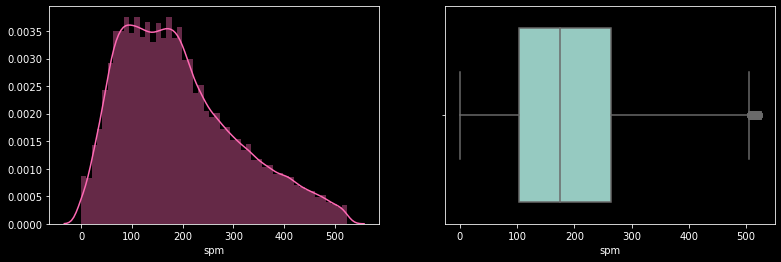

skewness:  0.6945187997356762


In [47]:
#2.Remove outliers
outliers('spm')

#removing outliers adujusted the skewness

Total null values: 210982


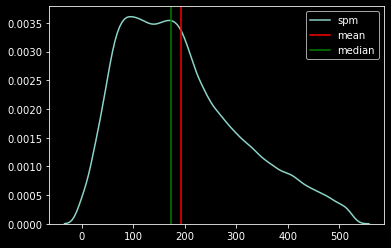

In [48]:
#TREATING MISSING VALUES

india_new['spm'].isnull().sum()

#lots of nan values are present, lets see the distribution mean median plot

#1.Mean Median Distribution
mean_median('spm')


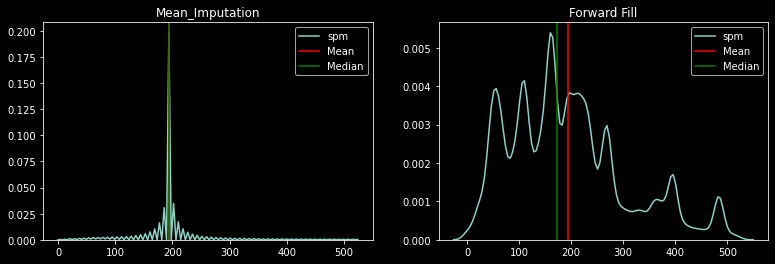

In [49]:
#2. Compare mean impute and forward fill
imputation_plots('spm')

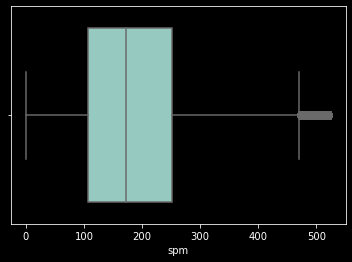

In [50]:
india_new['spm']=india_new['spm'].fillna(method='ffill')

#after filling the nan with ffill, still their were 11 nan values, so we treat them with mean
india_new['spm']=india_new['spm'].fillna(india_new['spm'].mean())
sns.boxplot(india_new['spm'])

In [51]:
india_new.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
date        0
dtype: int64

In [52]:
#FINALLY, the data is cleaned hushhhh!

## Analysis on Data

In [53]:
india_new.head()

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,96.60078,192.82822,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,96.60078,192.82822,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,96.60078,192.82822,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,96.60078,192.82822,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,96.60078,192.82822,1990-03-01


In [54]:
#To have the 5 states with highest pollutants
def state_poll(x,y,z,w):
    
    #group pollutants by state and plot them
    state_group=india_new[['state',x,y,z,w]].groupby('state').mean()
    state_group.reset_index(inplace=True)
    state_group.plot(kind='bar',x='state',figsize=(20,5),fontsize=15,title=f'State vs pollutants')
    
    
    lis=[x,y,z,w]
    for i,j in enumerate(lis):
        state_group.sort_values(j,inplace=True,ascending=False)
        print(f"\t\t\tStates where {j} is highest\n\n",state_group[['state',j]].head(5))
        print("*"*90)


			States where so2 is highest

           state        so2
32  Uttaranchal  23.116585
31  Uttarakhand  22.568767
27       Sikkim  19.800000
14    Jharkhand  16.112035
10      Gujarat  14.897699
******************************************************************************************
			States where no2 is highest

           state        no2
33  West Bengal  39.755413
8         Delhi  38.515272
14    Jharkhand  38.476179
26    Rajasthan  27.612291
3         Bihar  26.813738
******************************************************************************************
			States where rspm is highest

             state        rspm
14      Jharkhand  156.833474
25         Punjab  154.483393
30  Uttar Pradesh  152.707845
31    Uttarakhand  136.142067
11        Haryana  135.660364
******************************************************************************************
			States where spm is highest

             state         spm
31    Uttarakhand  383.154034
26      Rajasthan  343.190429


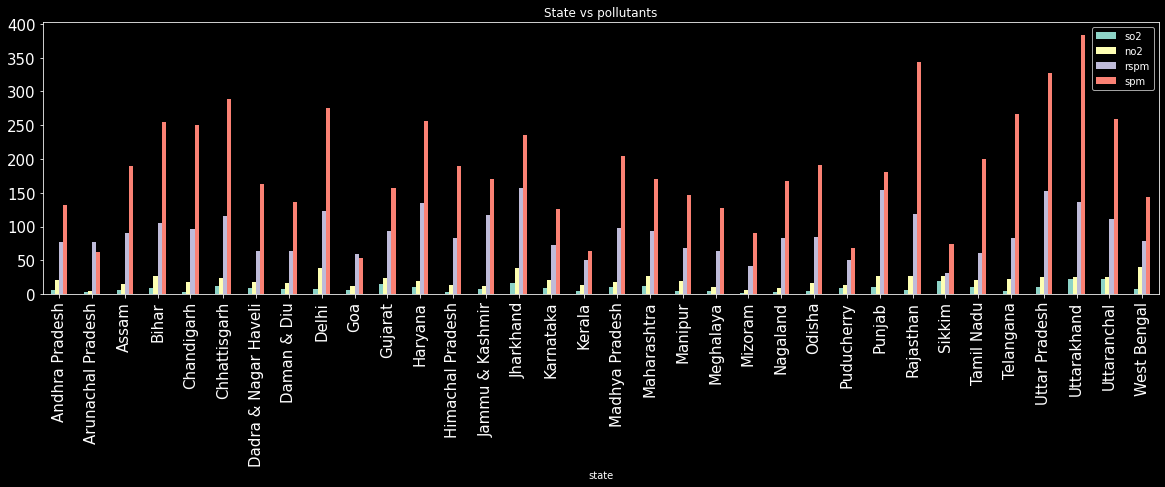

In [55]:
#Let's see the top five states that has highest so2 pollutant present in air

state_poll('so2','no2','rspm','spm')


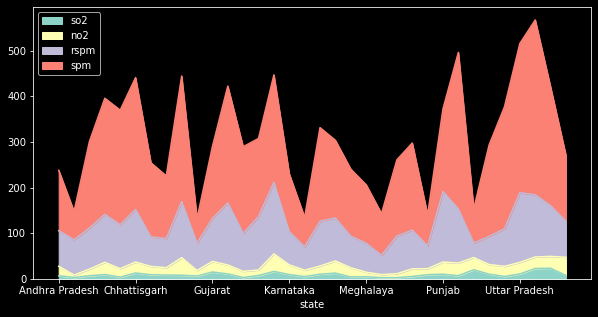

In [56]:
#Let visually see which pollutant is more in all state

state_plot=india_new.groupby('state').mean()[['so2','no2','rspm','spm']]
state_plot.plot.area(figsize=(10,5))

#Intresting observatin can be done from the graph, that spm spread is more in all states

In [57]:
#Lets get the answer to our question with visual plots for pollutant in air

pollutants=india_new.groupby('type').mean()[['so2','no2','rspm','spm']]
pollutants.sort_values('type',ascending=False,inplace=True)
pollutants.head()

,so2,no2,rspm,spm
type,,,,
Sensitive,5.911269,17.743237,77.406296,178.119005
RRO,8.109271,21.029596,93.298598,192.339376
NA,11.342651,19.530103,80.600779,152.865723
Industrial,9.910139,23.614633,104.325864,196.861449


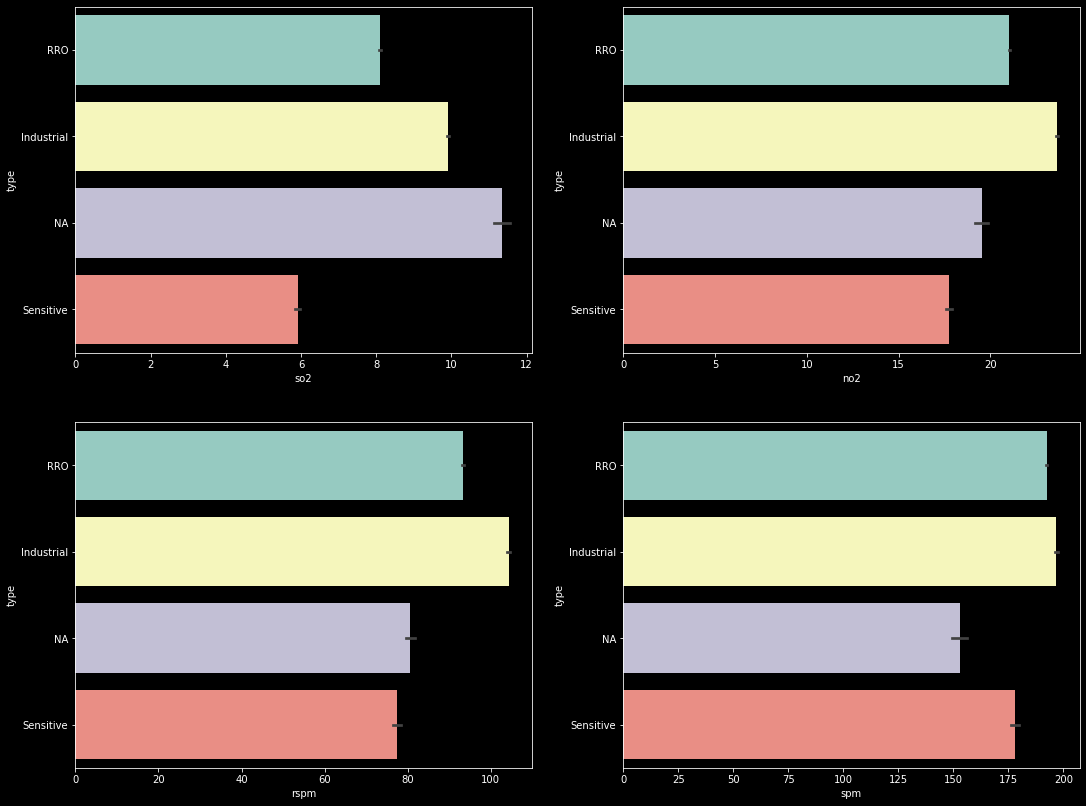

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.barplot("so2", y="type",
                 data=india_new,
                 ax=axes[0,0]
                )
ax = sns.barplot("no2", y="type",
                 data=india_new,
                 ax=axes[0,1]
                )
ax = sns.barplot("rspm", y="type",
                 data=india_new,
                 ax=axes[1,0]
                )
ax = sns.barplot("spm", y="type",
                 data=india_new,
                 ax=axes[1,1]
                )

In [59]:
#Now lets check location wise and extract the top 5 locations

def location_poll(x,y,z,w):
    loc_group=india_new[['location',x,y,z,w]].groupby('location').mean()
    loc_group.reset_index(inplace=True)
    lis=[x,y,z,w]
    
    for i,j in enumerate(lis):
        loc_group.sort_values(j,inplace=True,ascending=False)
        print(f"\t\t\tLOcations where {j} is highest\n\n",loc_group[['location',j]].head(5))
        print("*"*90)

In [60]:
#So2:
location_poll('so2','no2','rspm','spm')

			LOcations where so2 is highest

        location        so2
136    Kashipur  25.485149
238  Saharanpur  25.000000
104    Haldwani  24.791339
105    Haridwar  23.527553
71     Dehradun  23.349231
******************************************************************************************
			LOcations where no2 is highest

      location        no2
28   Baruipur  56.500000
228  Raniganj  47.600286
101    HALDIA  46.939759
17    Asansol  46.779442
83   Durgapur  45.549828
******************************************************************************************
			LOcations where rspm is highest

      location        rspm
25   Bareilly  209.734208
141    Khanna  193.377208
178   Mathura  187.690909
126    Jharia  185.099905
163   Lucknow  182.988718
******************************************************************************************
			LOcations where spm is highest

       location      spm
136   Kashipur  390.155
234   Rudrapur  390.155
231  Rishikesh  390.155
105   Haridwar  39

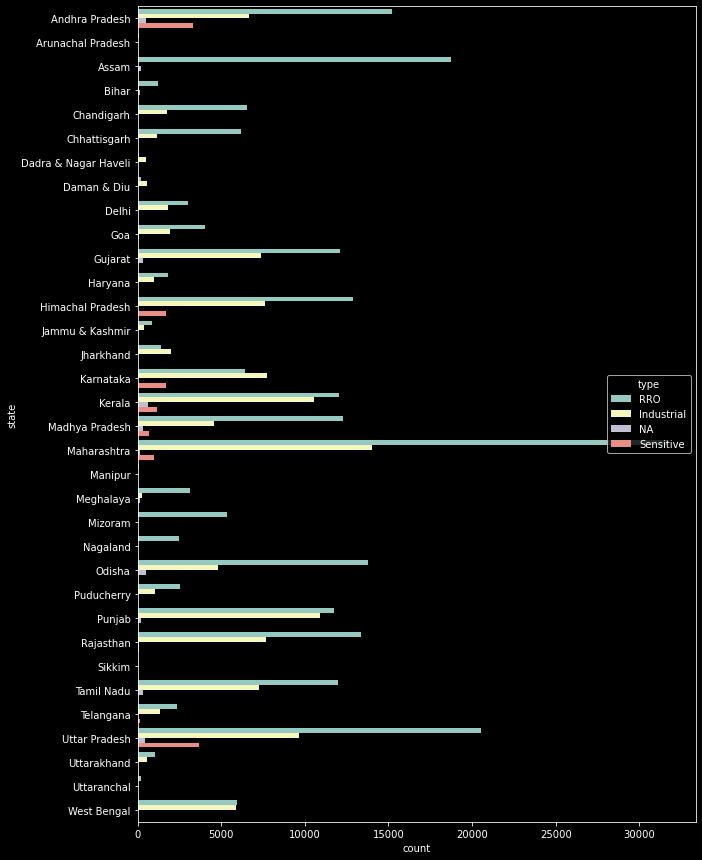

In [61]:
df=india_new[['state','type','date']]
plt.figure(figsize=(10,15))
df=df.set_index('date')
df['Year']=df.index.year
# indu_group=df[['state','type','Year']].groupby('state').count()
# indu_group.reset_index(inplace=True)
# indu_group.plot(kind='bar',x='state',figsize=(20,5),fontsize=15,title=f'State vs pollutants')
sns.countplot(y="state", hue="type", data=df)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

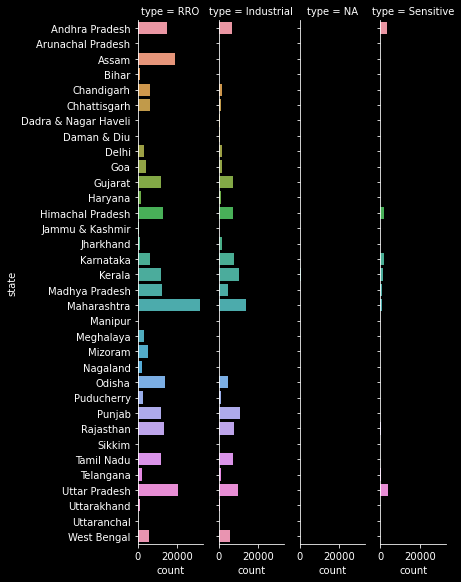

In [62]:
sns.catplot(y="state", col="type", data=df, kind="count",height=8, aspect=.2);

# Time Analysis

In [63]:
def univ_time_analysis(x):
    df_data=india_new[['date','state','location','type',x]]
    df_data=df_data.set_index('date')
    
    
    df_data['Weekdays']=df_data.index.dayofweek
    df_data['Month']=df_data.index.month
    df_data['Year']=df_data.index.year
    
    mapping(df_data,x)


In [64]:
def mapping(df_data,x):
    
    #Creating dictionary for days and month
    
    dmap={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
    month_dic={1:'January',2:'Febuary',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
           10:'October',11:'November',12:'December'}

    #Mapping days and month columns with the name dictionaries
    df_data['Weekdays']=df_data['Weekdays'].map(dmap)
    df_data['Month']=df_data['Month'].map(month_dic)
    
    
    #Creating subplots
    fig, ax = plt.subplots(3,1,figsize=(10,10))
    fig. tight_layout(pad=8.0)

    #Reindexing the columns, so to get names of days in order wile plotting
    lis=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    days=df_data['Weekdays'].value_counts().reindex(lis)
    print(days.plot(figsize=(10,5),title="Day Wise Plot",ax=ax[0]))
    
    #Reindexing the columns, so to get names of month in order wile plotting
    mon_lis=['January','Febuary','March','April','May','June','July','August','September',
       'October','November','December']
    month=df_data['Month'].value_counts().reindex(mon_lis)
    print(month.plot(figsize=(10,5),title="Month Wise Plot",ax=ax[1]))

    #Plot with respect to year
    year=df_data['Year'].value_counts()
    print(year.plot(figsize=(10,5),title="Year Wise Plot",ax=ax[2])) 
    
    
    #Heat map projection
    fig, ax = plt.subplots(figsize=(10,10))
    print(sns.heatmap(df_data.pivot_table(x,index='state',columns=['Year'],aggfunc='mean',margins=True),ax=ax,annot=True, linewidths=.5,cmap='BuPu'))

# Univariate Time Series Analysis

### 1.so2 

AxesSubplot(0.143056,0.727315;0.734722x0.156019)
AxesSubplot(0.143056,0.431019;0.734722x0.156019)
AxesSubplot(0.143056,0.134722;0.734722x0.156019)
AxesSubplot(0.125,0.125;0.62x0.755)


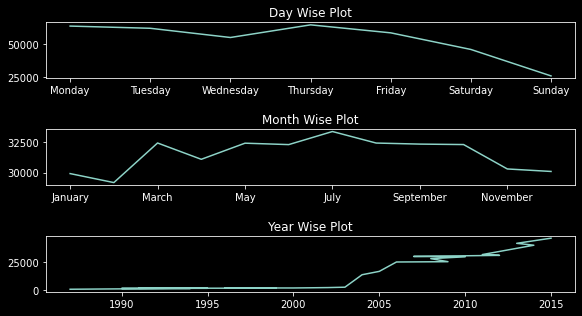

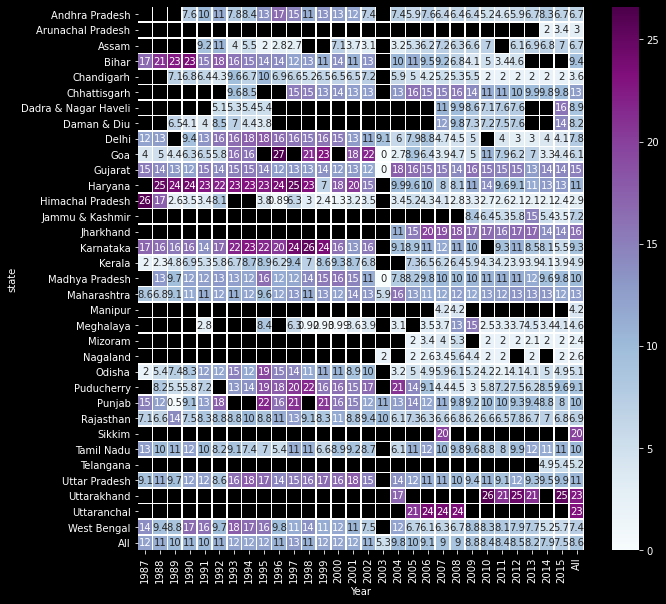

In [65]:
#Lets make some new columns, and analyse the so2 growth daily, monthly and yearly

univ_time_analysis('so2')


#Figure wise Observations :

#Figure 1:We can observe that their is a decreasing trend for so2 suspension on the weekends.

#Figure 2:We can see that the suspension of so2 is low at the starting month of the year, 
#than gradually increases and decreases, but it again gets low at the end of the year

#Figure 3:The graph says that the so2 suspension increased from 2003/4, lets get a clear 
#idea about it through heatmap

### 2.no2

AxesSubplot(0.143056,0.727315;0.734722x0.156019)
AxesSubplot(0.143056,0.431019;0.734722x0.156019)
AxesSubplot(0.143056,0.134722;0.734722x0.156019)
AxesSubplot(0.125,0.125;0.62x0.755)


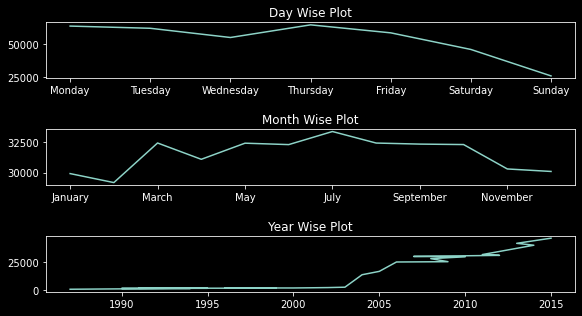

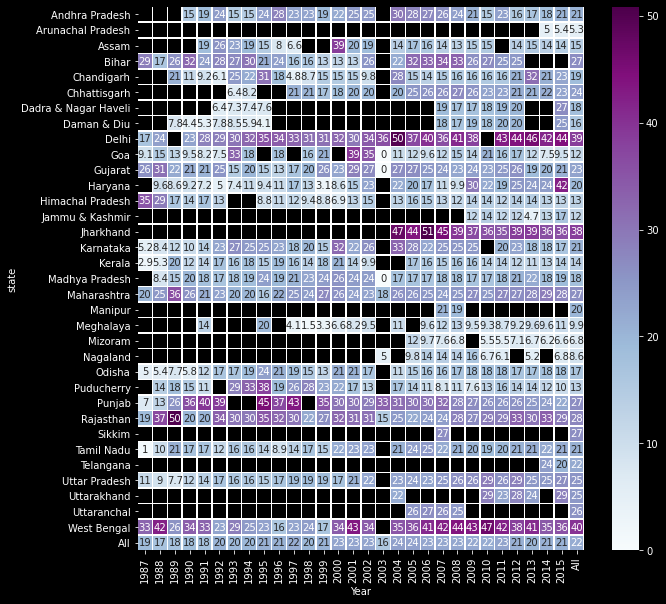

In [66]:
univ_time_analysis('no2')

#Observations:

#Figure 1,2 and 3 shows similar observations to that of so2.

#Whereas heatmap has some differnt story to tell.

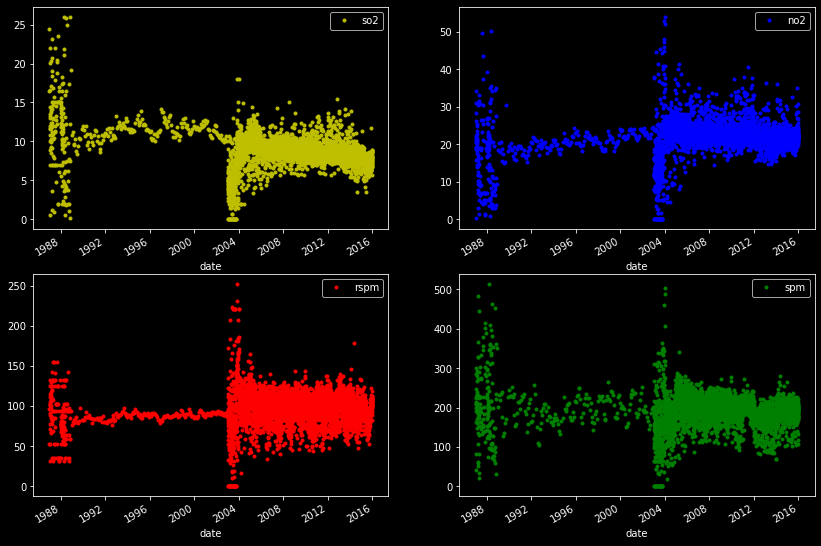

In [67]:
#Lets look at the emission over years by grouping it datewise

emissions_SO2=india_new.groupby('date').mean()['so2']
emissions_NO2=india_new.groupby('date').mean()['no2']
emissions_rspm=india_new.groupby('date').mean()['rspm']
emissions_spm=india_new.groupby('date').mean()['spm']

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14,10))
    
emissions_SO2.plot(style='y.',legend=True,ax=axes[0,0])
emissions_NO2.plot(style='b.',legend=True,ax=axes[0,1])
emissions_rspm.plot(style='r.',legend=True,ax=axes[1,0])
emissions_spm.plot(style='g.', legend=True,ax=axes[1,1])


In [68]:
india_new.tail()

,state,location,type,so2,no2,rspm,spm,date
435734,West Bengal,ULUBERIA,RRO,20.0,44.0,148.0,47.0,2015-12-15
435735,West Bengal,ULUBERIA,RRO,17.0,44.0,131.0,47.0,2015-12-18
435736,West Bengal,ULUBERIA,RRO,18.0,45.0,140.0,47.0,2015-12-21
435737,West Bengal,ULUBERIA,RRO,22.0,50.0,143.0,47.0,2015-12-24
435738,West Bengal,ULUBERIA,RRO,20.0,46.0,171.0,47.0,2015-12-29


#### Similarly we can do for spm and rspm...I'm to lazy to do it now, so lets dive directly in time series forecasting using AQI 

# AQI AND PI

In [69]:
#as I had learned from the summary of the so2 col, that the max value of so2 is 26.75, so I
#had decided to calculate till the rang of 100 which will cover all the values of so2.Similarly
#for other columns I had looked at the max value and limited the range of calcukation.
def cal_so2(so2):
    
    si=0
    if (so2<=40):
        si=(((so2-0)* (100-0))/(80-0))+0        
    return si
##########################################################
def cal_no2(no2):
    
    ni=0
    if (no2<=80):
        ni=(((no2-0)* (100-0))/(80-0))+0  
        
    return ni
#########################################################
def cal_rspm(rspm):
     
    ri=0
    if (rspm<=100):
        ri=(((rspm-0)* (100-0))/(100-0))+0
    
    elif (rspm>100) and (rspm<=150):
        ri=(((rspm-101)* (200-101))/(150-101))+101
        
    elif (rspm>150) and (rspm<=350):
        ri=(((rspm-151)* (300-201))/(350-151))+201
    
    return ri
##########################################################
def cal_spm(spm):
    spi=0
    if (spm<=200):
        spi=(((spm-0)* (100-0))/(200-0))+0
    
    elif (spm>200) and (spm<=260):
        spi=(((spm-201)* (200-101))/(260-201))+101
        
    elif (spm>260) and (spm<=400):
        spi=(((spm-261)* (300-201))/(400-261))+201
    
    elif (spm>400) and (spm<=800):
        spi=(((spm-401)* (400-301))/(800-401))+301
    
    return spi  
    
    


In [70]:
 #Now lets apply this on the polluatant columns and calculate their Pollutant Index
india_new['si']=india_new['so2'].apply(cal_so2)
india_new['ni']=india_new['no2'].apply(cal_no2)
india_new['ri']=india_new['rspm'].apply(cal_no2)
india_new['spi']=india_new['spm'].apply(cal_no2)


#### Creating AQI Column

In [71]:
#Now lets calculate AQI for the pollutants.

#the pollutant, whose pi is highest is taken as aqi.

def cal_aqi(si,ni,ri,spi):
    if (si>ni and si>ri and si>spi):
        aqi=si
    
    elif (ni>si and ni>ri and ni>spi):
        aqi=ni
    
    elif (ri>ni and ri>si and ri>spi):
        aqi=ri
        
    else:
        aqi=spi
    
    return aqi

india_new['AQI']=india_new.apply(lambda x: cal_aqi(x['si'],x['ni'],x['ri'],x['spi']),axis=1)


#### Analysis of AQI

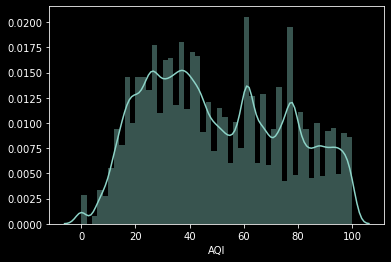

In [72]:
sns.distplot(india_new['AQI'])

AxesSubplot(0.143056,0.727315;0.734722x0.156019)
AxesSubplot(0.143056,0.431019;0.734722x0.156019)
AxesSubplot(0.143056,0.134722;0.734722x0.156019)
AxesSubplot(0.125,0.125;0.62x0.755)


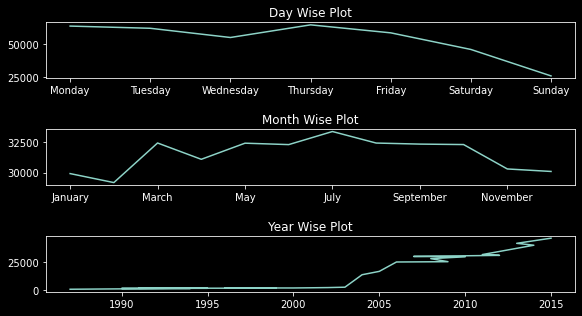

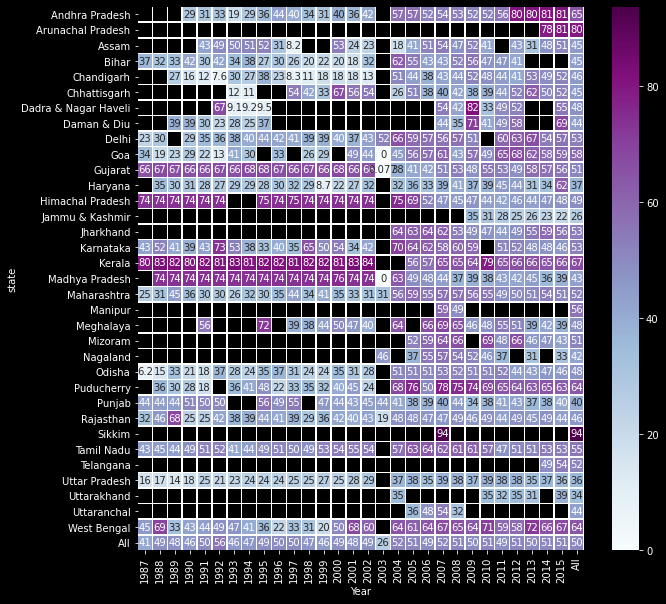

In [73]:
univ_time_analysis('AQI')

#Observations:
#Plot shows that AQI index is high in all month, but it seems its slightly highest in July.
#AQI index increases year by year

## Time Series Data Preperation Using AQI For Forecasting.

#### 1. Resampling and Interpolation

##### i. Resample

In [74]:
#Let's resample it yearly, monthly, weekly and daily 

du=india_new
du=du.set_index('date')
dummy=du[['AQI']]

yearly=dummy.resample('Y').mean()
monthly=dummy.resample('M').mean()
weekly=dummy.resample('W').mean()
daily=dummy.resample('D').mean()


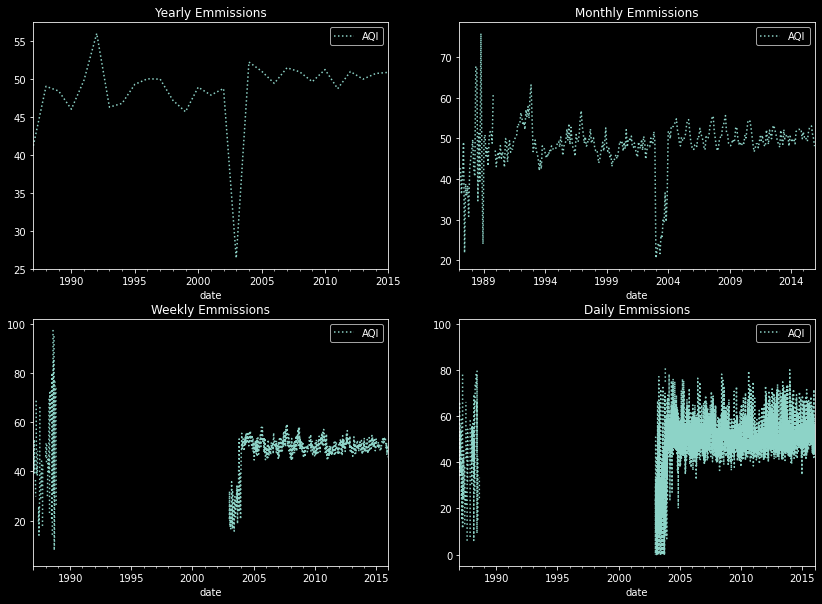

In [75]:
#Now lets plot the samples

fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(14,10))
yearly.plot(style=[':'],
            ax=axes[0,0],
            title='Yearly Emmissions')

monthly.plot(style=[':'],
             ax=axes[0,1],
             title='Monthly Emmissions')

weekly.plot(style=[':'],
            ax=axes[1,0],
            title='Weekly Emmissions')

daily.plot(style=[':'],
            ax=axes[1,1],
            title='Daily Emmissions')

#As the dataset is huge so we will get a messy plot for it, instead of that we will group it by
#month and look at the monthly data 


#We can see that is presence of some trend and seasonality with some large spikes.

In [76]:
#checking null values in yearly,monthly and daily resampled series
yearly.isnull().sum()

AQI    0
dtype: int64

In [77]:
monthly.isnull().sum()

AQI    2
dtype: int64

In [78]:
weekly.isnull().sum()

AQI    600
dtype: int64

In [79]:
daily.isnull().sum()

AQI    5568
dtype: int64

###### ii. Interpolation

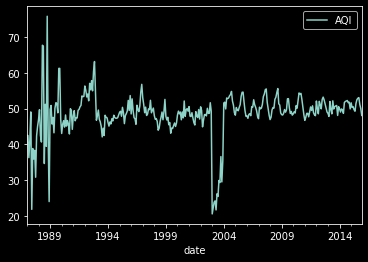

In [80]:
#As their are only 2 missing values present in monthly series, so we will fill it with ffill
monthly.ffill().plot()

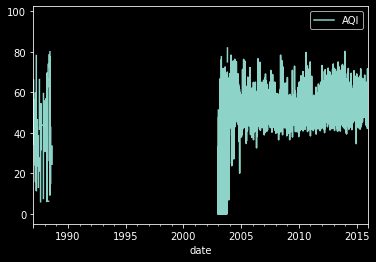

In [81]:
#We can see that thier are many nan values present in daily series, so we will try differnt 
#interpolate methods
daily.plot()

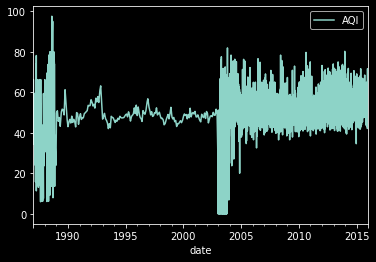

In [82]:
#LINEAR METHOD
cd=daily
cd.interpolate(method='linear').plot()

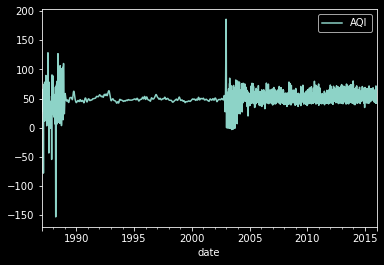

In [83]:
#QUADRATIC METHOD
cd.interpolate(method='polynomial',order=2).plot()

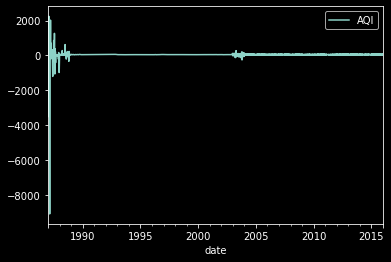

In [84]:
#Spline METHOD
cd.interpolate(method='spline',order=4).plot()

### 2. Moving Average Smoothing

In [85]:
dummy['Month']=dummy.index.month
dummy['Year']=dummy.index.year
dummy['Day']=dummy.index.day



In [86]:
dummy.Year.nunique()

29

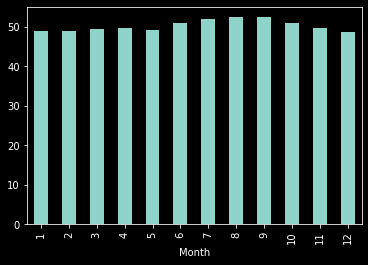

In [87]:
dummy.groupby('Month')['AQI'].mean().plot.bar()

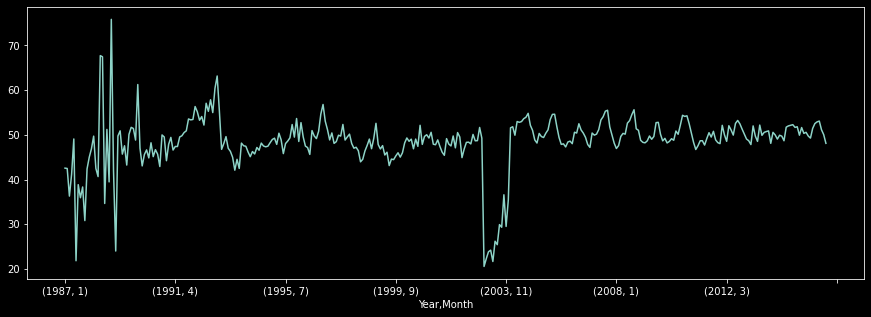

In [88]:
dummy.groupby(['Year','Month'])['AQI'].mean().plot(figsize=(15,5))

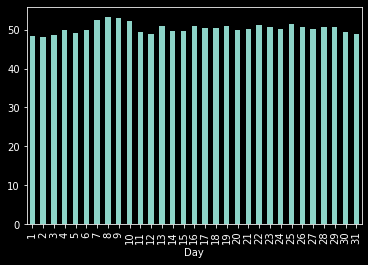

In [89]:
dummy.groupby('Day')['AQI'].mean().plot.bar()

#### Rolling Mean

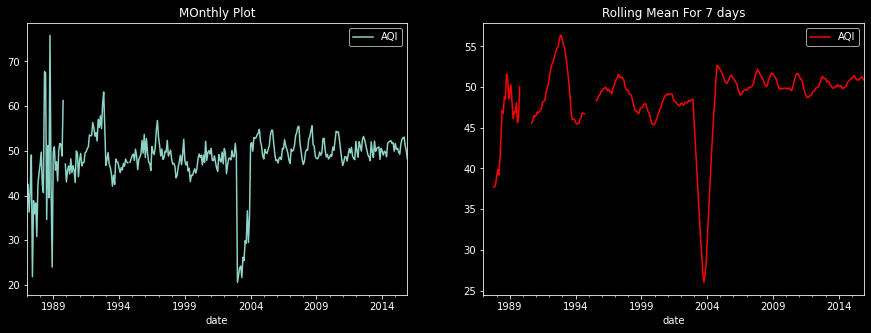

In [90]:
#We will apply smoothing on monthly plot
fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(15,5))
monthly.plot(ax=axes[0],title="MOnthly Plot")

roll_mean=monthly.rolling(window=10).mean()
roll_mean.plot(ax=axes[1],color='red',title="Rolling Mean For 7 days")


In [91]:
# from datetime import datetime
# india_new['Year']=pd.DatetimeIndex(india_new['date']).year


# start_date = datetime(1996,1,1)
# end_date = datetime(1997,1,1)
# s_e = dummy[f'{start_date.date()}':f'{end_date.date()}']

# plt.figure(figsize=(10,4))
# plt.plot(s_e)
# #plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
# plt.ylabel('year', fontsize=16)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)



### Let's make baseline model

In [92]:
dummy['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 1987, 1988, 1989, 2003], dtype=int64)

In [93]:
dummy=dummy.sort_values(by=['Year','Month'])
dummy[dummy['Year']==2015]


,AQI,Month,Year,Day
date,,,,
2015-01-01,77.50,1,2015,1
2015-01-04,77.50,1,2015,4
2015-01-07,77.50,1,2015,7
2015-01-10,97.50,1,2015,10
2015-01-13,77.50,1,2015,13
...,...,...,...,...
2015-12-15,58.75,12,2015,15
2015-12-18,58.75,12,2015,18
2015-12-21,58.75,12,2015,21


#### WHITE NOISE CHECKING

In [94]:
yearly.describe()

,AQI
count,29.000000
mean,48.482312
std,4.975354
min,26.436207
25%,47.913456
50%,49.454296
75%,50.907232
max,56.036731


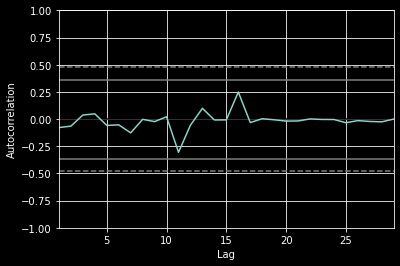

In [95]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(yearly)


#As the mean is not zero, variance is varrying and the spikes shows that their is correlation.
#So, it is not white noise model, hence we have scope to improve it.

#### Check for Stationarity

There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.

Look at Plots: You can review a time series plot of your data and visually check if there are                  any obvious trends or seasonality.

Summary Statistics: You can review the summary statistics for your data for seasons or random                       partitions and check for obvious or significant differences.

Statistical Tests: You can use statistical tests to check if the expectations of stationarity                      are met or have been violated.



#### 1. Plot to check Stationarity

In [96]:
from datetime import datetime


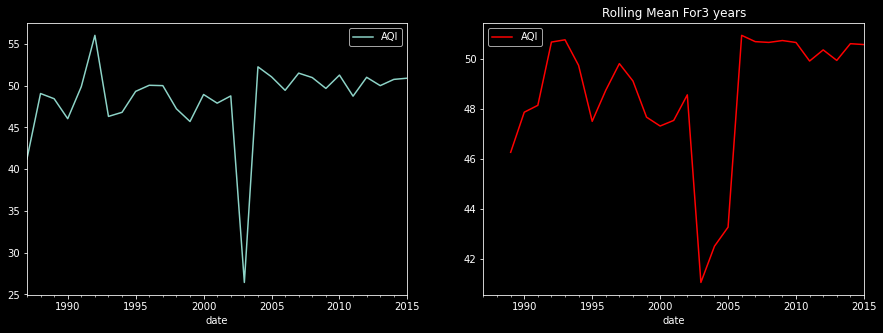

In [97]:
fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(15,5))

roll_mean=yearly.rolling(window=3).mean()
yearly.plot(ax=axes[0])

roll_mean.plot(ax=axes[1],color='red',title="Rolling Mean For3 years")



#### 3. Agumented Dickey Fuller Test (To check stationarity)

In [98]:
from statsmodels.tsa.stattools import adfuller 
s=yearly.values


result=adfuller(s)
labels=['t-stat','p-value','lag','No. of obsv']

for value,label in zip(result,labels):
    print(label+' : '+str(value))
    
print('Critical Values:') 
for key, value in result[4].items(): 
    print('\t%s: %.3f' % (key, value))



if result[1]<=0.05:
    print("\n p-value < 0.05... Reject H0,that says data is stationary.")
    
else:
    print("\n p-value > 0.05... Fail to reject H0,that says data is non-stationary.")
 
    
#p-value is less than 0.05, which means the data is stationary

t-stat : -5.718134968545985
p-value : 7.04271394203054e-07
lag : 0
No. of obsv : 28
Critical Values:
	1%: -3.689
	5%: -2.972
	10%: -2.625

 p-value < 0.05... Reject H0,that says data is stationary.


#### 4. Components of TS

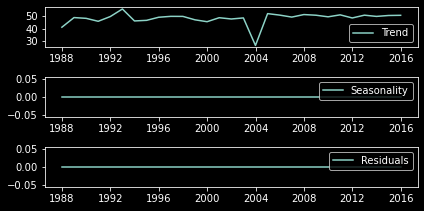

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose

df=yearly
decompose=seasonal_decompose(df)

trend=decompose.trend
seasonal=decompose.seasonal
resi=decompose.resid

fig,ax=plt.subplots(3)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)

plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)

plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)

plt.plot(resi, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#From the components graph wee can see that, their is only presence of trend .

In [100]:
#Now for baseline model we will keep the trend as it is, and will predict the rmse score

In [101]:
#WE WILL PREPARE BASELINE MODEL BY SHIFTING DATA BY 1 LAG

df=pd.concat([yearly,yearly.shift(3)],axis=1)
df.columns=('Actual','Forecast')
df.head()

,Actual,Forecast
date,,
1987-12-31,41.237150,NaN
1988-12-31,49.067708,NaN
1989-12-31,48.445565,NaN
1990-12-31,46.050554,41.237150
1991-12-31,49.894638,49.067708


In [102]:
df.dropna(inplace=True)

#### RMSE Score For BASELINE MODEL

In [103]:
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(df['Actual'],df['Forecast']))
rmse

#So, we get a +_ error of 25 every year in AQI count.

6.9845874735957905

### Decomposition 

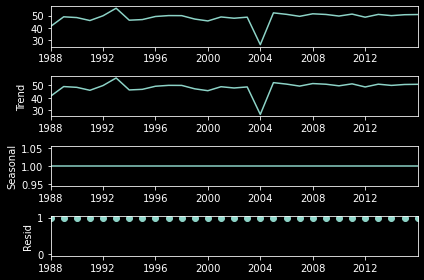

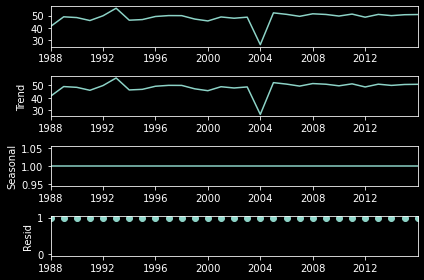

In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose

mult_result = seasonal_decompose(yearly, model = "multiplicative")
mult_result.plot()



#As the trend is not linear we will use multiplicative mode


In [105]:
#Now lets remove the trend by differencing, by taking the shift of 2
diff=pd.concat([yearly,yearly-yearly.shift(3)],axis=1)
diff.columns=('AQI','diff_first')
diff.dropna(inplace=True)

In [106]:
#Now, lets check it for our timeseries dataset using Adfuller

from statsmodels.tsa.stattools import adfuller

result=adfuller(diff['diff_first'])
labels=['t-stat','p-value','lag','No. of obsv']

for value,label in zip(result,labels):
    print(label+' : '+str(value))

if result[1]<=0.05:
    print("\n p-value < 0.05... Reject H0,that says data is stationary.")
    
else:
    print("\n p-value > 0.05... Fail to reject H0,that says data is non-stationary.")
 
    

t-stat : -5.255400017676784
p-value : 6.769037929995298e-06
lag : 0
No. of obsv : 25

 p-value < 0.05... Reject H0,that says data is stationary.


### TRAIN-TEST SPLIT

Observations: 29
Training Observations: 23
Test Observations: 6


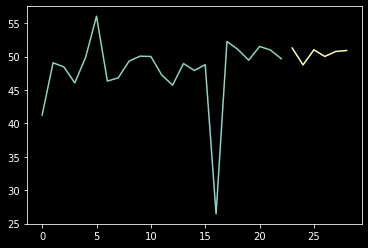

array([51.27686847, 48.75235466, 51.01332365, 50.01406122, 50.76066292,
       50.90723247])

In [107]:
x=yearly['AQI'].values
train_size=int(len(x)*0.80)
train,test=x[:train_size],x[train_size:]
print('Observations: %d' % (len(x))) 
print('Training Observations: %d' % (len(train))) 
print('Test Observations: %d' % (len(test)))

plt.plot(train) 
plt.plot([None for i in train] + [x for x in test]) 
plt.show()
test

### AR MODEL

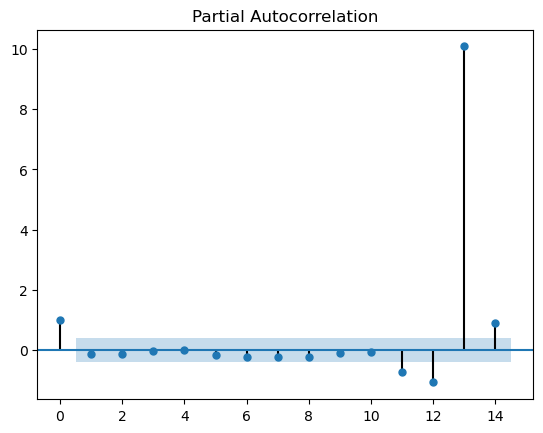

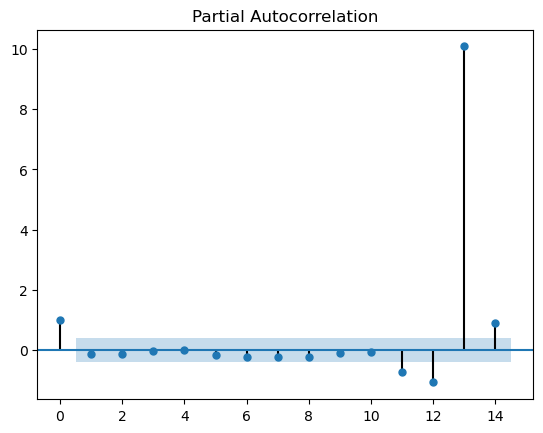

In [108]:
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.style.use('default')
plot_pacf(train)

#We can see that the lag value cuts at 1, so we will take p=1

LAG:8
Confidence:[ 1.49396366e+02 -2.79087650e-01 -1.16465588e-01 -3.84917939e-02
 -5.30407803e-02 -1.45979754e-01 -2.56027409e-01 -8.37165683e-01
 -3.82021279e-01]
predicted=63.385448, expected=51.276868
predicted=47.077755, expected=48.752355
predicted=41.358775, expected=51.013324
predicted=45.755454, expected=50.014061
predicted=44.316519, expected=50.760663
predicted=43.283591, expected=50.907232


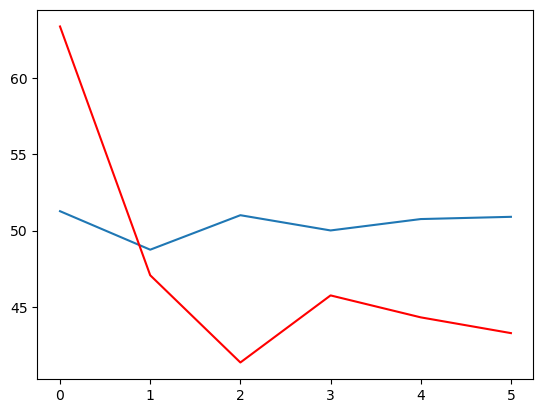

Test RMSE: 7.750


In [109]:
model=AR(train)
model_fit=model.fit()

print(f"LAG:{model_fit.k_ar}")
print(f"Confidence:{model_fit.params}")
      
#make prediction
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 
for i in range(len(predictions)): 
    print('predicted=%f, expected=%f' % (predictions[i], test[i])) 
rmse = np.sqrt(mean_squared_error(test, predictions)) 
#plot results 
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()
print('Test RMSE: %.3f' % rmse) 


#MOdel has choose lag=8, and we can see that rmse of naive model is more better than AR model

### MA Model

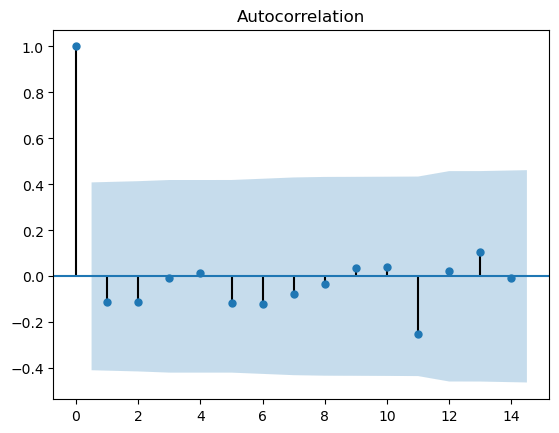

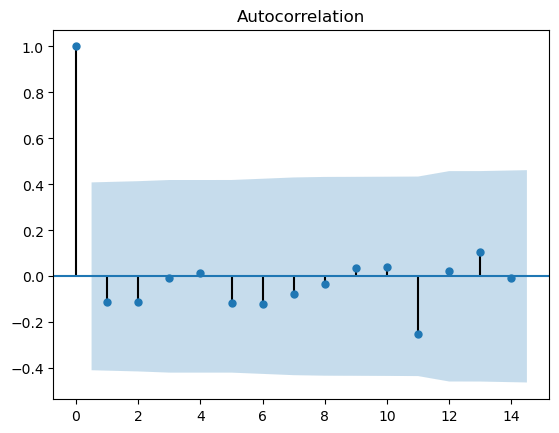

In [110]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.style.use('default')
plot_acf(train)


#For MA Model we will take p=0 and will plot acf plot

predicted=-1.170082, expected=51.276868
predicted=0.049425, expected=48.752355
predicted=0.049425, expected=51.013324
predicted=0.049425, expected=50.014061
predicted=0.049425, expected=50.760663
predicted=0.049425, expected=50.907232


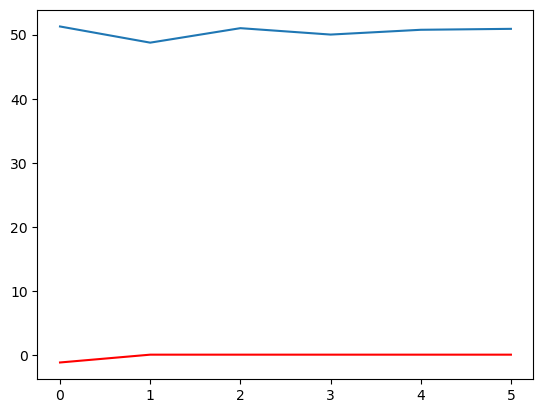

Test RMSE: 50.620


In [111]:
model = ARIMA(train, order=(0, 1, 1))  
model_fit = model.fit()  


predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 
for i in range(len(predictions)): 
    print('predicted=%f, expected=%f' % (predictions[i], test[i])) 
rmse = np.sqrt(mean_squared_error(test, predictions)) 

#plot results 
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()
print('Test RMSE: %.3f' % rmse) 


#rmse of MA model is way larger than naive prediction, so we will ignore it.

### ARIMA 

predicted=48.439727, expected=50.907232
Test RMSE: 1.846


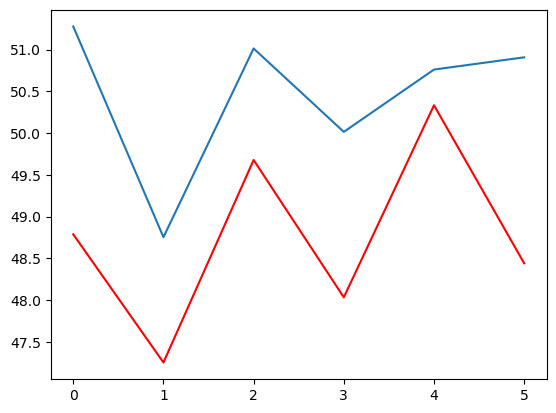

In [112]:
history = [x for x in train] 
predictions = list() 
# walk-forward validation 
for t in range(len(test)): 
    model = ARIMA(history, order=(3,1,2)) 
    model_fit = model.fit(disp=0) 
    output = model_fit.forecast() 
    yhat = output[0]
    predictions.append(yhat) 
    obs = test[t] 
    history.append(obs) 
print('predicted=%f, expected=%f' % (yhat, obs)) 
# evaluate forecasts 
rmse = np.sqrt(mean_squared_error(test, predictions)) 
print('Test RMSE: %.3f' % rmse) 
# plot forecasts against actual outcomes 
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()

#So we can consider ARIMA Model.

### Holt Winter Model

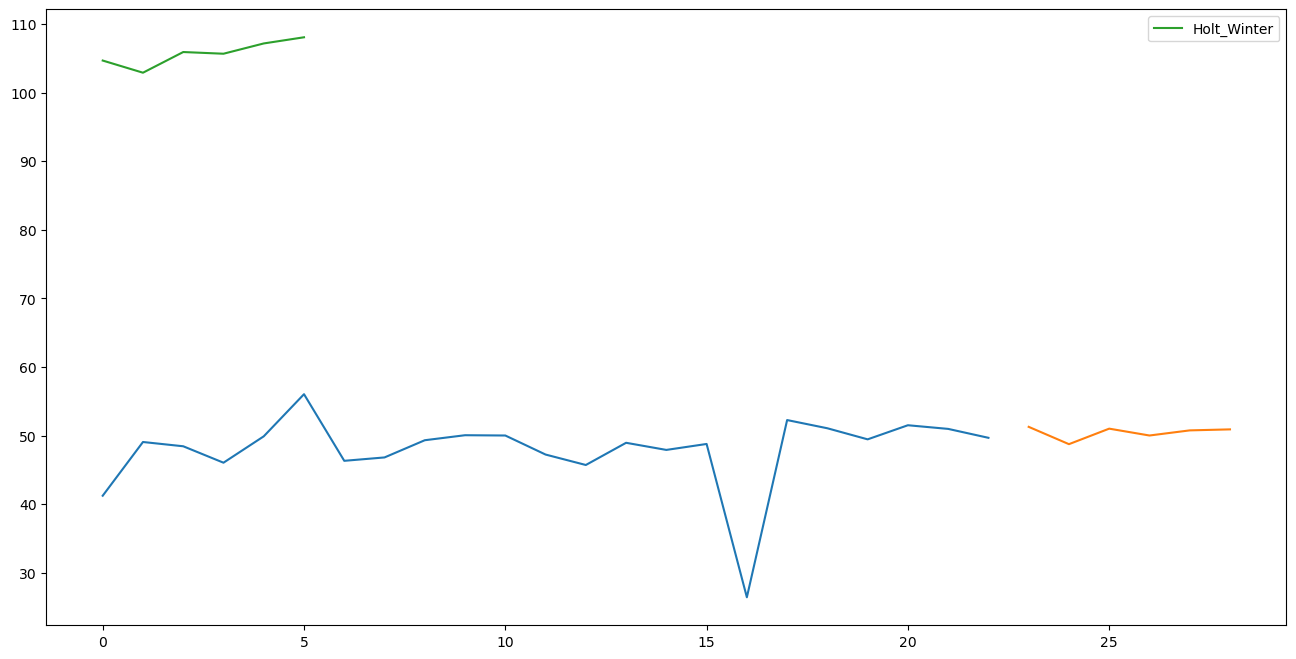

In [158]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

x=yearly['AQI'].values
train_size=int(len(x)*0.80)

# y_hat_avg = Test.copy()
# fit1 = Holt(np.asarray(Train['so2'])).fit()
# y_hat_avg['Holt_Winter'] = fit1.predict(start=split+1,end=len(monthly_so2["so2"]))


y_hat_avg = pd.DataFrame(test).copy()
fit1 = Holt(train).fit()

y_hat_avg['Holt_Winter'] = fit1.predict(start=train_size+1,end=29)

plt.figure(figsize=(16,8))
plt.plot(train) 
plt.plot([None for i in train] + [x for x in test]) 
plt.plot([x for x in test]+y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')


# #Underfitting

# Train =monthly_so2[:split+150]

# test1=monthly_so2

# y_hat_avg = test1.copy()
# fit1 = Holt(np.asarray(Train['so2'])).fit()
# y_hat_avg['Holt_Winter'] = fit1.predict(start=1,end=len(monthly_so2["so2"]))
# plt.figure(figsize=(16,8))
# plt.plot(Train.index, Train['so2'], label='Train')
# plt.plot(Test.index,Test['so2'], label='Test')
# plt.plot(y_hat_avg.index,y_hat_avg['Holt_Winter'], label='Holt_Winter')
# plt.legend(loc='best')

##### Step1: TESTING STATIONARITY:

In [ ]:
# #Now, lets check it for our timeseries dataset using Adfuller

# from statsmodels.tsa.stattools import adfuller

# result=adfuller(monthly_so2['so2'])
# labels=['t-stat','p-value','lag','No. of obsv']

# for value,label in zip(result,labels):
#     print(label+' : '+str(value))

# if result[1]<=0.05:
#     print("\n p-value < 0.05... Reject H0,that says data is stationary.")
    
# else:
#     print("\n p-value > 0.05... Fail to reject H0,that says data is non-stationary.")
 
    

##### Step 2: Making Time Series Stationary

In [ ]:
# #First Differnce

# monthly_so2['first_diff']=monthly_so2['so2']-monthly_so2['so2'].shift(7)

# #CHECK

# result=adfuller(monthly_so2['first_diff'].dropna())
# labels=['t-stat','p-value','lag','No. of obsv']

# for value,label in zip(result,labels):
#     print(label+' : '+str(value))

# if result[1]<=0.05:
#     print("\n p-value < 0.05... Reject H0,that says data is stationary.")
    
# else:
#     print("\n p-value < 0.05... Fail to reject H0,that says data is non-stationary.")
 
    
    
# #here we can see that the data is stationarized now

In [ ]:
# monthly_so2['first_diff'].plot()

In [ ]:
# #For our convinience lets take difference one more time.
# monthly_so2['second_diff']=monthly_so2['first_diff']-monthly_so2['first_diff'].shift(7)

# monthly_so2['second_diff'].plot()

# #we can see that the negative spike is removed now

##### Step 3: PLotting ACF and PACF Plots

SARIMA=Seasonal Autoregressive Integrated MovingAverage
             =    (p)            (d)         (q)
    
#for d value we generaly experiment with 0/1/2 value and not going beyond 2

#For knowing the value of p we use PACF plot
#For knowing the value of d we initaly take 0 and then check for different values
#For knowing the value of q we use ACF

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:

# plot_acf(monthly_so2['so2'])


In [ ]:
# plot_pacf(monthly_so2['so2'])

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# from sklearn.metrics import mean_squared_error
# from matplotlib import pyplot

# X = monthly_so2["so2"]
# X = X[1:]

# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]

# predictions = list()
# for t in range(len(test)):
# 	model = SARIMAX(history,order=(0,1,0), seasonal_order=(1,1,1,48))
# 	model_fit = model.fit(disp=0)
# 	output = model_fit.forecast()
# 	yhat = output[0]
# 	predictions.append(yhat)
# 	obs = test[t]
# 	history.append(obs)


In [ ]:
# error = np.sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % error)

In [ ]:
# plt.plot(test.values)
# plt.plot(predictions, color='red')


# #rmse of the SARIMAX model is very low, which is a good sign. But if we look at the plot,
# #the prediction line does not fit properly to the test values/observed values, at some 
# #places it predicts very low value for the observed value

# Holt-Winter Model

In [ ]:
# from statsmodels.tsa.holtwinters import Holt
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# from statsmodels.tsa.holtwinters import Holt
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# split=int(len(monthly_so2["so2"]) * 0.66)
# Train =pd.DataFrame(monthly_so2["so2"][:split])
# Test = pd.DataFrame(monthly_so2["so2"][split:])

# y_hat_avg = Test.copy()
# fit1 = Holt(np.asarray(Train['so2'])).fit()
# y_hat_avg['Holt_Winter'] = fit1.predict(start=split+1,end=len(monthly_so2["so2"]))

# plt.figure(figsize=(16,8))
# plt.plot(Train.index, Train['so2'], label='Train')
# plt.plot(Test.index,Test['so2'], label='Test')
# plt.plot(y_hat_avg.index,y_hat_avg['Holt_Winter'], label='Holt_Winter')
# plt.legend(loc='best')


# # #Underfitting

# # Train =monthly_so2[:split+150]

# # test1=monthly_so2

# # y_hat_avg = test1.copy()
# # fit1 = Holt(np.asarray(Train['so2'])).fit()
# # y_hat_avg['Holt_Winter'] = fit1.predict(start=1,end=len(monthly_so2["so2"]))
# # plt.figure(figsize=(16,8))
# # plt.plot(Train.index, Train['so2'], label='Train')
# # plt.plot(Test.index,Test['so2'], label='Test')
# # plt.plot(y_hat_avg.index,y_hat_avg['Holt_Winter'], label='Holt_Winter')
# # plt.legend(loc='best')

In [ ]:
# plt.figure(figsize=(16,8))
# plt.plot(Train.index, Train['so2'], label='Train')
# plt.plot(Test.index,Test['so2'], label='Test')
# plt.plot(y_hat_avg.index,y_hat_avg['Holt_Winter'], label='Holt_Winter')
# plt.legend(loc='best')

In [ ]:
# #Underfitting

# Train =monthly_so2[:split+150]

# test1=monthly_so2

# y_hat_avg = test1.copy()
# fit1 = Holt(np.asarray(Train['so2'])).fit()
# y_hat_avg['Holt_Winter'] = fit1.predict(start=1,end=len(monthly_so2["so2"]))
# plt.figure(figsize=(16,8))
# plt.plot(Train.index, Train['so2'], label='Train')
# plt.plot(Test.index,Test['so2'], label='Test')
# plt.plot(y_hat_avg.index,y_hat_avg['Holt_Winter'], label='Holt_Winter')
# plt.legend(loc='best')